In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data\cleaned.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display column names and their data types
print("\nColumn names and data types:")
print(df.dtypes)

# Display general statistics for numerical columns
print("\nGeneral statistics for numerical columns:")
print(df.describe())

# Display general statistics for categorical columns
print("\nGeneral statistics for categorical columns:")
print(df.describe(include=['object', 'category']))

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

First 5 rows of the dataset:
      Last_Name First_Name           Role           Lab      Lab_Role  \
0        Alessi      Dario        Lead-PI        Alessi          Jefe   
1  Abu-Remaileh    Monther          Co-PI  Abu-Remaileh          Jefe   
2         Muqit    Miratul          Co-PI        Alessi          Jefe   
3       Pfeffer    Suzanne          Co-PI        Alessi          Jefe   
4       Tonelli  Francesca  Key Personnel        Alessi  Research Mgr   

                 ORCID  
0  0000-0002-2140-9185  
1  0000-0003-3772-0477  
2  0000-0001-9733-2404  
3  0000-0002-6462-984X  
4  0000-0002-4600-6630  

Column names and data types:
Last_Name     object
First_Name    object
Role          object
Lab           object
Lab_Role      object
ORCID         object
dtype: object

General statistics for numerical columns:
       Last_Name First_Name           Role       Lab Lab_Role  \
count       1406       1406           1379      1400     1306   
unique      1251       1057            

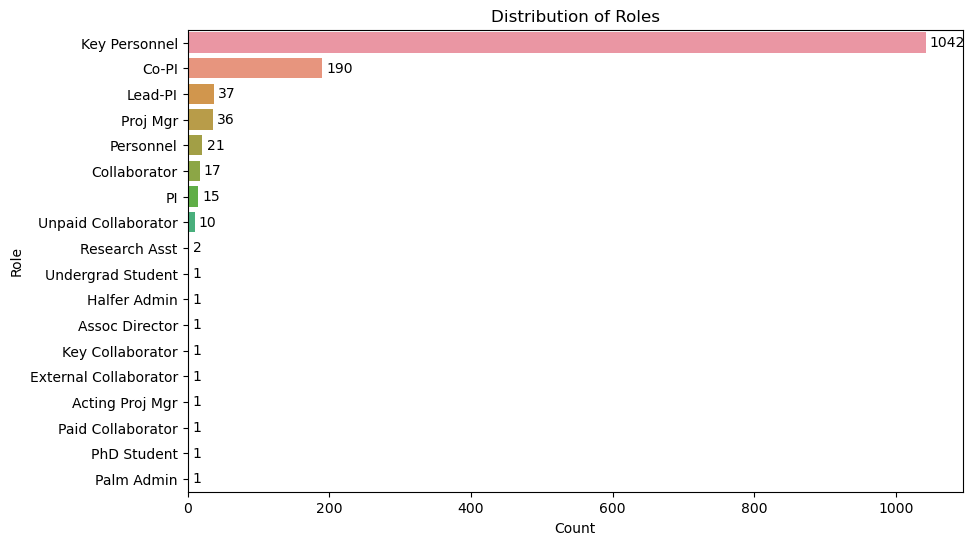

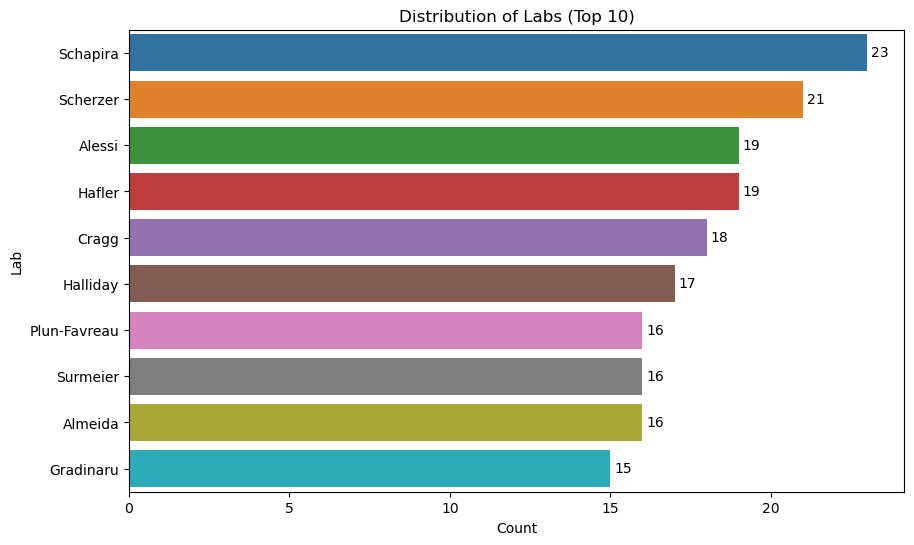

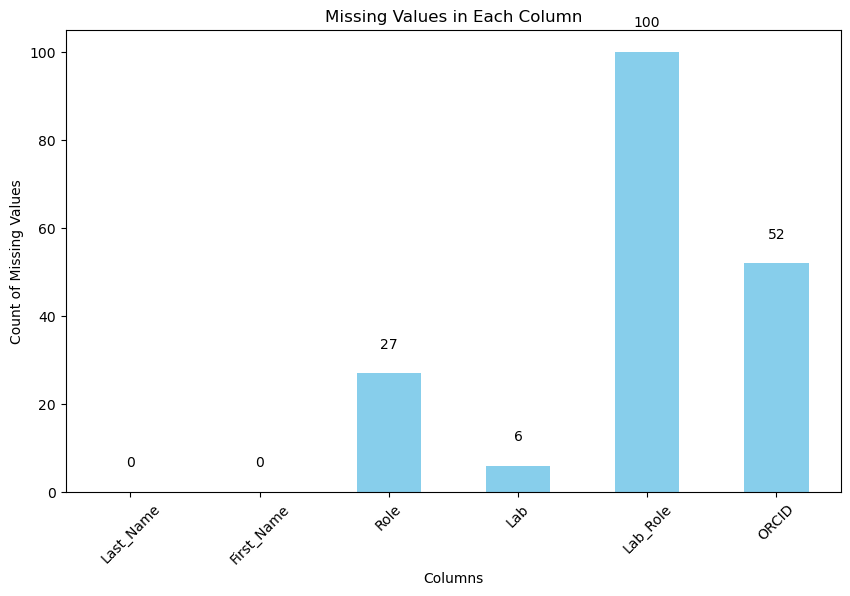

In [14]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot the distribution of roles with counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Role', data=df, order=df['Role'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title('Distribution of Roles')
plt.xlabel('Count')
plt.ylabel('Role')
plt.show()

# Plot the distribution of labs with counts
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Lab', data=df, order=df['Lab'].value_counts().index[:10])  # Top 10 labs
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title('Distribution of Labs (Top 10)')
plt.xlabel('Count')
plt.ylabel('Lab')
plt.show()

# Plot the missing values in each column with counts
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
ax = missing_values.plot(kind='bar', color='skyblue')
for i, v in enumerate(missing_values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.show()

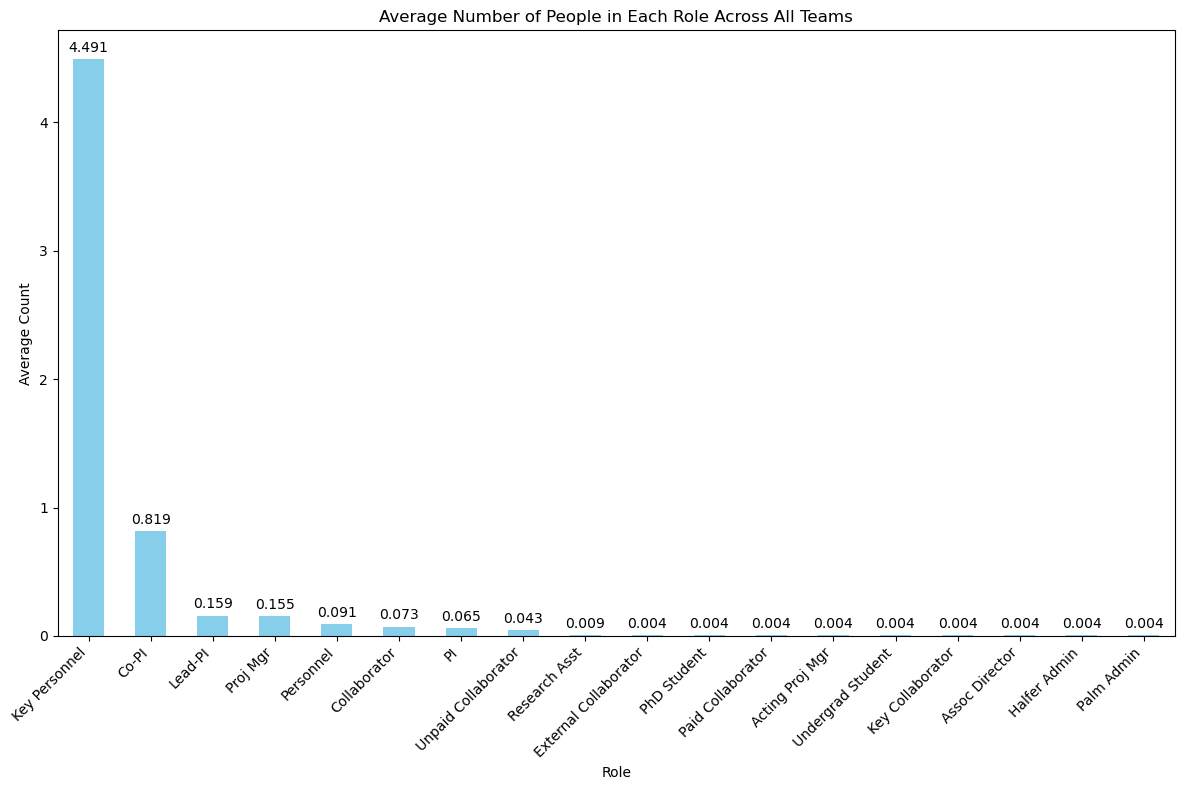

In [19]:
# Calculate the average number of people in each role across all teams
role_counts = df['Role'].value_counts()
average_role_counts = role_counts / df['Lab'].nunique()

# Plot the average number of people in each role
plt.figure(figsize=(12, 8))
ax = average_role_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add counts on top of each bar, rounded to 4 decimal places
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fmt='%.3f')

plt.title('Average Number of People in Each Role Across All Teams')
plt.xlabel('Role')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Group by Last_Name and First_Name, and aggregate the unique Labs for each person
people_multiple_teams = df.groupby(['Last_Name', 'First_Name'])['Lab'].unique()

# Filter for people who are associated with more than one team
people_multiple_teams = people_multiple_teams[people_multiple_teams.apply(len) > 1]

# Convert the result to a dictionary for easier access
people_multiple_teams_dict = people_multiple_teams.to_dict()

print(people_multiple_teams_dict)

{('Agalliu', 'Dritan'): array(['Sulzer', 'Agalliu'], dtype=object), ('Al Dalahmah', 'Osama A'): array(['Sulzer', 'Goldman'], dtype=object), ('Amara', 'Amy'): array(['Harms', 'Amara'], dtype=object), ('Beach', 'Thomas'): array(['Civin Laboratory for Neuropathology', 'Scherzer'], dtype=object), ('Dunnack', 'Jesse'): array(['Hockemeyer', 'Bateup'], dtype=object), ('Garcia Ruiz', 'Sonia'): array(['Plun-Favreau', 'Ryten'], dtype=object), ('Gil Martinez', 'Ana Luisa'): array(['Morris', 'Ryten'], dtype=object), ('Goldman', 'James'): array(['Goldman', 'Sulzer'], dtype=object), ('Hicks', 'Amy'): array(['Plun-Favreau', 'Ryten'], dtype=object), ('Lam', 'Pui Yiu'): array(['Alessi', 'Muqit'], dtype=object), ('Li', 'Xiaobo'): array(['Kordower', 'Gupta'], dtype=object), ('Nouh', 'Moustafa'): array(['Trudeau', 'Labrecque'], dtype=object), ('Oikonomou', 'Catherine'): array(['Gradinaru', 'Mazmanian'], dtype=object), ('Phung', 'Toan'): array(['Alessi', 'Muqit'], dtype=object), ('Robin', 'Joe'): array(['N

In [25]:
# Number of people in people_multiple_teams_dict
num_people_multiple_teams = len(people_multiple_teams_dict)

# Average number of teams per person
average_teams_per_person = total_teams / num_people_multiple_teams

print(f"Number of people in people_multiple_teams_dict: {num_people_multiple_teams}")
print(f"Average number of teams per person: {average_teams_per_person:.2f}")

Number of people in people_multiple_teams_dict: 24
Average number of teams per person: 2.00


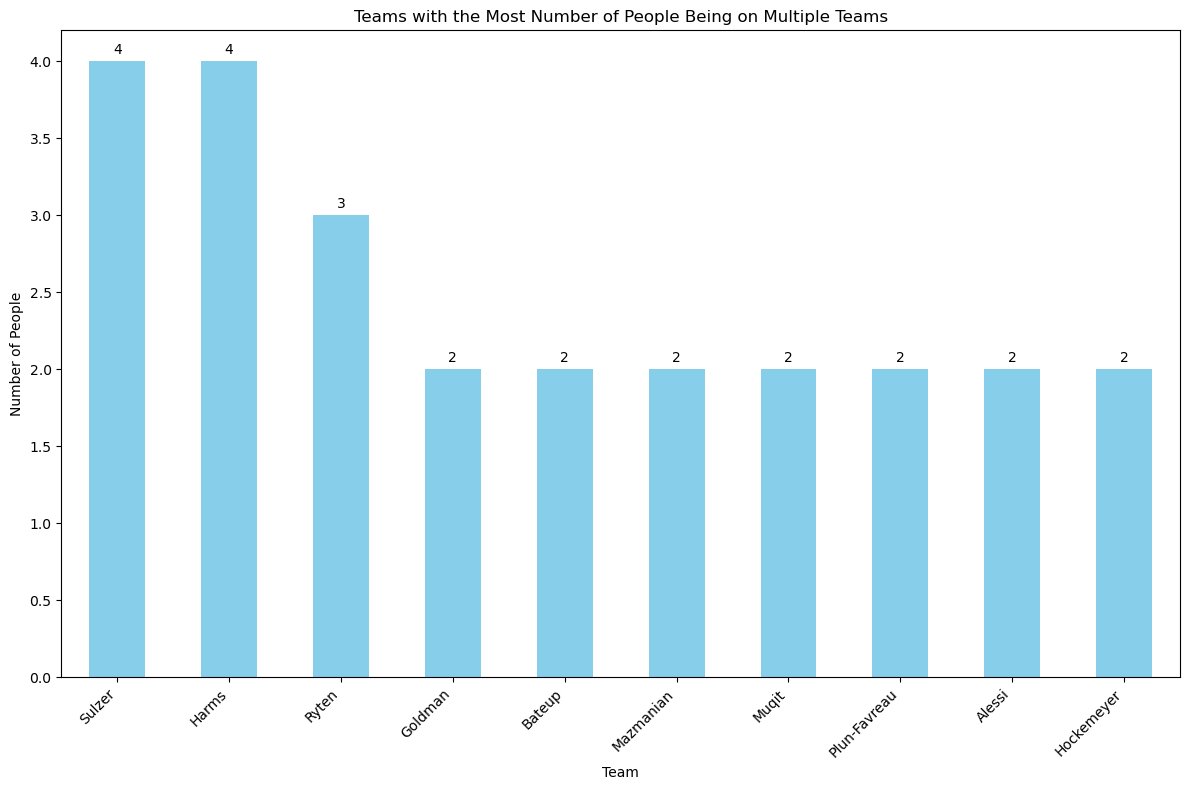

In [26]:
# Count the number of people associated with multiple teams for each team
teams_with_multiple_people = people_multiple_teams.explode().value_counts()

# Plot the top teams with the most number of people being on multiple teams
plt.figure(figsize=(12, 8))
ax = teams_with_multiple_people.head(10).plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.title('Teams with the Most Number of People Being on Multiple Teams')
plt.xlabel('Team')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Example dataframe
# df = pd.read_csv("your_file.csv")  # if reading from file
# Sample format:
# df = pd.DataFrame({
#     'First_Name': ['Alice', 'Bob', 'Charlie', 'Alice'],
#     'Last_Name': ['Smith', 'Jones', 'Brown', 'Smith'],
#     'Lab': ['LabA', 'LabA', 'LabB', 'LabB'],
#     'ORCID': ['0000-0001', '0000-0002', '0000-0003', '0000-0001']
# })

# Combine names into one label
df['Name'] = df['First_Name'] + ' ' + df['Last_Name']

# Build mapping from ORCID to Name (always use first name seen)
orcid_to_name = df.drop_duplicates('ORCID')[['ORCID', 'Name']].set_index('ORCID')['Name'].to_dict()

# Build person-to-lab mapping
person_labs = df.groupby('ORCID')['Lab'].apply(set).to_dict()

# Clean Lab column
df = df[df['Lab'].notna()].copy()
df['Lab'] = df['Lab'].astype(str).str.strip()

# Now safe to get list of labs
labs = sorted(df['Lab'].unique())
lab_colors = {lab: plt.cm.tab20(i) for i, lab in enumerate(labs)}


# Build graph
G = nx.Graph()
for orcid, name in orcid_to_name.items():
    G.add_node(orcid, label=name, labs=person_labs[orcid])

# Add edges for people in same lab
for lab in labs:
    members = df[df['Lab'] == lab]['ORCID'].unique()
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            G.add_edge(members[i], members[j])

# Layout: spring layout grouped by shared labs
pos = nx.spring_layout(G, k=0.5, iterations=100)

# Draw nodes as pie charts for people in multiple labs
fig, ax = plt.subplots(figsize=(10, 10))
for orcid, (x, y) in pos.items():
    labs = list(G.nodes[orcid]['labs'])
    num_labs = len(labs)
    radius = 0.07
    start_angle = 0
    for lab in labs:
        color = lab_colors[lab]
        wedge = Wedge((x, y), radius, start_angle, start_angle + 360 / num_labs, facecolor=color, edgecolor='black')
        ax.add_patch(wedge)
        start_angle += 360 / num_labs
    ax.text(x, y, G.nodes[orcid]['label'], ha='center', va='center', fontsize=8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)

# Legend
for lab, color in lab_colors.items():
    ax.plot([], [], color=color, label=lab, marker='o', linestyle='')

plt.legend(title="Lab Teams")
plt.axis('off')
plt.title("People Network by Shared Lab Team")
plt.show()


KeyError: nan

C:\Users\User\AppData\Local\Temp\ipykernel_28568\740389646.py:70: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


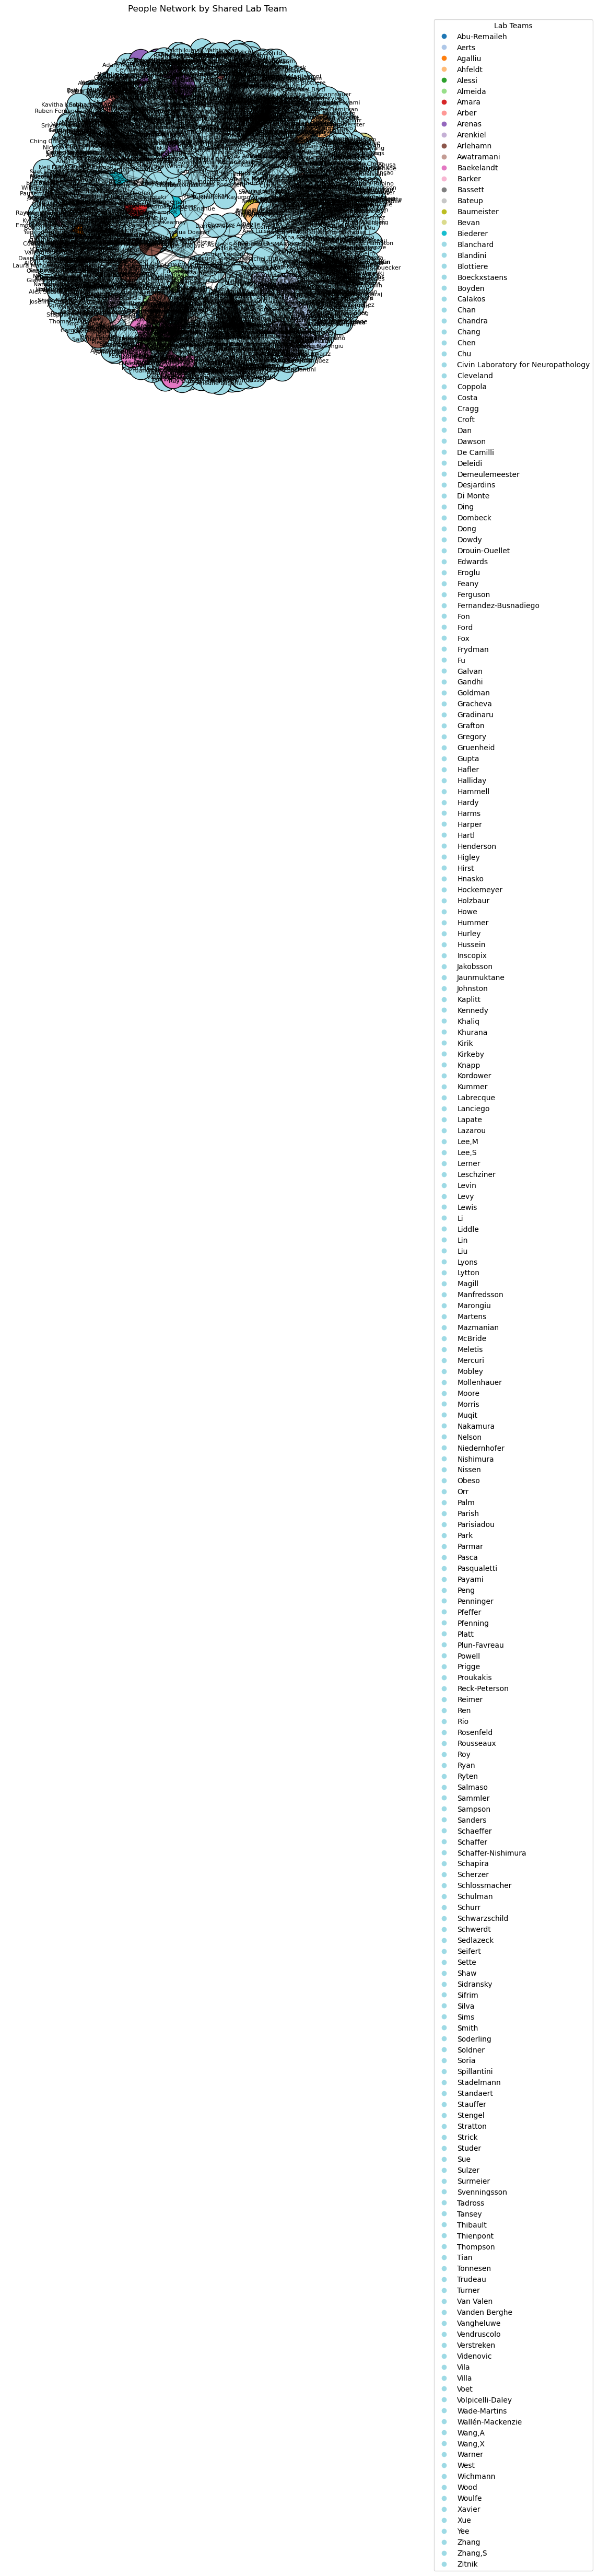

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# --- Load or define your dataframe here ---
# df = pd.read_csv("your_file.csv")
# Example placeholder:
# df = pd.DataFrame({
#     'First_Name': ['Alice', 'Bob', 'Charlie', 'Alice'],
#     'Last_Name': ['Smith', 'Jones', 'Brown', 'Smith'],
#     'Lab': ['LabA', 'LabA', 'LabB', 'LabB'],
#     'ORCID': ['0000-0001', '0000-0002', '0000-0003', '0000-0001']
# })

# --- DATA CLEANING ---
df = df[df['ORCID'].notna() & df['Lab'].notna()].copy()           # Remove rows with missing ORCID or Lab
df['Lab'] = df['Lab'].astype(str).str.strip()                     # Ensure Lab is string
df['ORCID'] = df['ORCID'].astype(str).str.strip()                 # Ensure ORCID is string
df['First_Name'] = df['First_Name'].astype(str).str.strip()
df['Last_Name'] = df['Last_Name'].astype(str).str.strip()
df['Name'] = df['First_Name'] + ' ' + df['Last_Name']             # Combine names for display

# --- MAPPING & GROUPING ---
orcid_to_name = df.drop_duplicates('ORCID')[['ORCID', 'Name']].set_index('ORCID')['Name'].to_dict()
person_labs = df.groupby('ORCID')['Lab'].apply(set).to_dict()

labs = sorted(df['Lab'].unique())
lab_colors = {lab: plt.cm.tab20(i) for i, lab in enumerate(labs)}

# --- BUILD GRAPH ---
G = nx.Graph()
for orcid, name in orcid_to_name.items():
    G.add_node(orcid, label=name, labs=person_labs[orcid])

# Add edges between people in same lab
for lab in labs:
    members = df[df['Lab'] == lab]['ORCID'].unique()
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            G.add_edge(members[i], members[j])

# --- LAYOUT ---
pos = nx.spring_layout(G, k=0.5, iterations=100)

# --- DRAW GRAPH WITH SPLIT-COLOR NODES ---
fig, ax = plt.subplots(figsize=(10, 10))
for orcid, (x, y) in pos.items():
    labs = list(G.nodes[orcid]['labs'])
    num_labs = len(labs)
    radius = 0.07
    start_angle = 0
    for lab in labs:
        color = lab_colors[lab]
        wedge = Wedge((x, y), radius, start_angle, start_angle + 360 / num_labs, facecolor=color, edgecolor='black')
        ax.add_patch(wedge)
        start_angle += 360 / num_labs
    ax.text(x, y, G.nodes[orcid]['label'], ha='center', va='center', fontsize=8)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)

# Legend
for lab, color in lab_colors.items():
    ax.plot([], [], color=color, label=lab, marker='o', linestyle='')

plt.legend(title="Lab Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('off')
plt.title("People Network by Shared Lab Team")
plt.tight_layout()
plt.show()


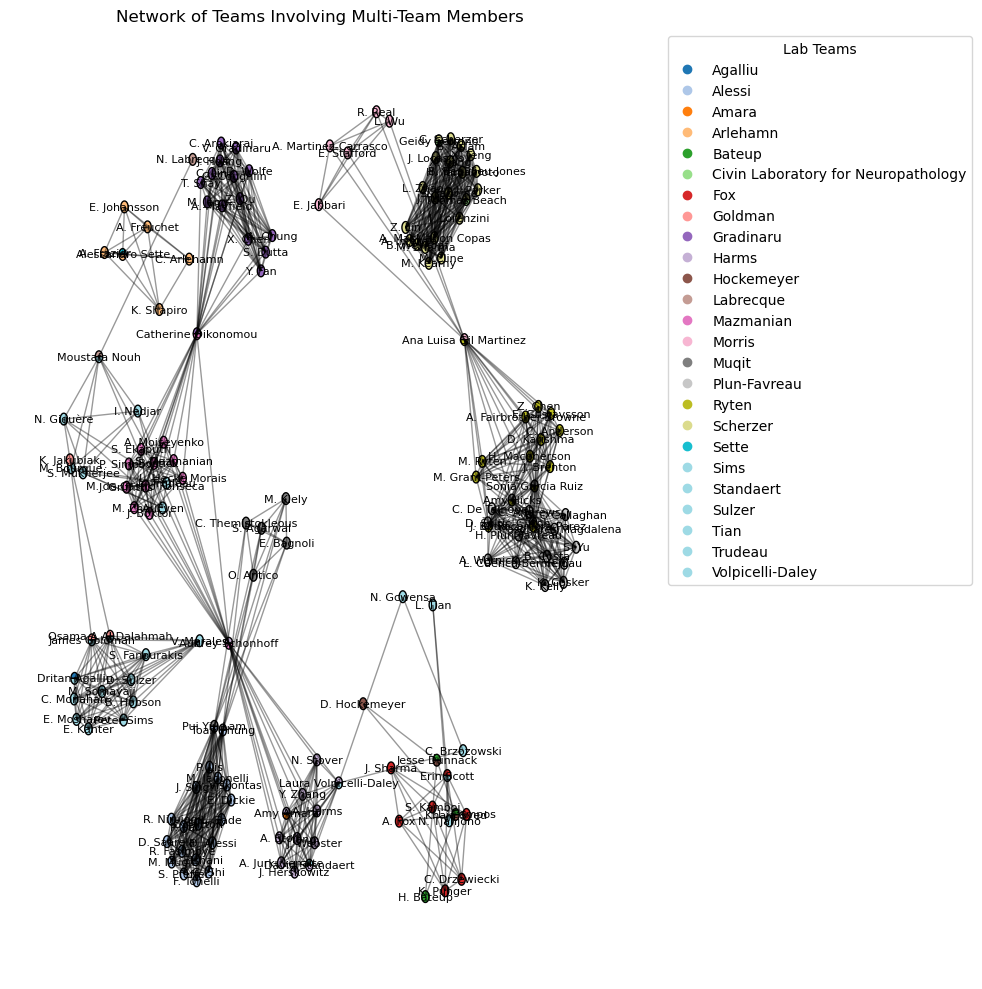

In [33]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# --- Load or define your dataframe here ---
# df = pd.read_csv("your_file.csv")

# Sample placeholder (optional)
# df = pd.DataFrame({
#     'First_Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Dana'],
#     'Last_Name': ['Smith', 'Jones', 'Brown', 'Smith', 'White'],
#     'Lab': ['LabA', 'LabA', 'LabB', 'LabB', 'LabC'],
#     'ORCID': ['0000-0001', '0000-0002', '0000-0003', '0000-0001', '0000-0001']
# })

# --- DATA CLEANING ---
df = df[df['ORCID'].notna() & df['Lab'].notna()].copy()
df['Lab'] = df['Lab'].astype(str).str.strip()
df['ORCID'] = df['ORCID'].astype(str).str.strip()
df['First_Name'] = df['First_Name'].astype(str).str.strip()
df['Last_Name'] = df['Last_Name'].astype(str).str.strip()
df['Name'] = df['First_Name'] + ' ' + df['Last_Name']

# --- FILTER: Keep only labs with at least one multi-team person ---
# 1. Identify people in multiple teams
lab_counts = df.groupby('ORCID')['Lab'].nunique()
multi_team_orcids = lab_counts[lab_counts > 1].index

# 2. Find labs that contain at least one multi-team person
labs_with_multi = df[df['ORCID'].isin(multi_team_orcids)]['Lab'].unique()

# 3. Filter df to only those labs
df = df[df['Lab'].isin(labs_with_multi)].copy()

# If nothing left, stop early
if df.empty:
    print("No qualifying labs found with multi-team individuals.")
else:
    # --- MAPPING & GROUPING ---
    # Count number of labs per person
    lab_counts = df.groupby('ORCID')['Lab'].nunique()

    # Build name labels: full name for multi-lab, initials otherwise
    def format_name(row):
        orcid = row['ORCID']
        first = row['First_Name']
        last = row['Last_Name']
        if lab_counts[orcid] > 1:
            return f"{first} {last}"
        else:
            return f"{first[0]}. {last}"

    df['Label'] = df.apply(format_name, axis=1)
    orcid_to_name = df.drop_duplicates('ORCID')[['ORCID', 'Label']].set_index('ORCID')['Label'].to_dict()

    person_labs = df.groupby('ORCID')['Lab'].apply(set).to_dict()
    labs = sorted(df['Lab'].unique())
    lab_colors = {lab: plt.cm.tab20(i) for i, lab in enumerate(labs)}

    # --- BUILD GRAPH ---
    G = nx.Graph()
    for orcid, name in orcid_to_name.items():
        G.add_node(orcid, label=name, labs=person_labs[orcid])

    for lab in labs:
        members = df[df['Lab'] == lab]['ORCID'].unique()
        for i in range(len(members)):
            for j in range(i + 1, len(members)):
                G.add_edge(members[i], members[j])

    # --- LAYOUT ---
    pos = nx.spring_layout(G, k=1.5, scale=5, iterations=200)


    # --- DRAW GRAPH WITH SPLIT-COLOR NODES ---
    fig, ax = plt.subplots(figsize=(10, 10))
    for orcid, (x, y) in pos.items():
        labs = list(G.nodes[orcid]['labs'])
        num_labs = len(labs)
        radius = 0.07
        start_angle = 0
        for lab in labs:
            color = lab_colors[lab]
            wedge = Wedge((x, y), radius, start_angle, start_angle + 360 / num_labs, facecolor=color, edgecolor='black')
            ax.add_patch(wedge)
            start_angle += 360 / num_labs
        ax.text(x, y, G.nodes[orcid]['label'], ha='center', va='center', fontsize=8)

    nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)

    # Legend
    for lab, color in lab_colors.items():
        ax.plot([], [], color=color, label=lab, marker='o', linestyle='')

    plt.legend(title="Lab Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis('off')
    plt.title("Network of Teams Involving Multi-Team Members")
    plt.tight_layout()
    plt.show()


In [34]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex

# --- Load your DataFrame ---
# df = pd.read_csv("your_file.csv")

# Clean and normalize strings
df = df[df['ORCID'].notna() & df['Lab'].notna()].copy()
df['Lab'] = df['Lab'].astype(str).str.strip()
df['ORCID'] = df['ORCID'].astype(str).str.strip()
df['First_Name'] = df['First_Name'].astype(str).str.strip()
df['Last_Name'] = df['Last_Name'].astype(str).str.strip()
df['Name'] = df['First_Name'] + ' ' + df['Last_Name']

# --- Identify multi-team individuals ---
lab_counts = df.groupby('ORCID')['Lab'].nunique()
multi_team_orcids = lab_counts[lab_counts > 1].index
single_team_df = df[~df['ORCID'].isin(multi_team_orcids)]
multi_team_df = df[df['ORCID'].isin(multi_team_orcids)]

# --- Color palette for labs ---
labs = sorted(df['Lab'].unique())
lab_colors = {lab: to_hex(plt.cm.tab20(i % 20)) for i, lab in enumerate(labs)}

# --- Build graph ---
G = nx.Graph()

# Group nodes for single-team people
group_nodes = {}
for lab, group in single_team_df.groupby('Lab'):
    node_id = f"{lab} Team"
    G.add_node(node_id, label=node_id, labs={lab}, is_group=True)
    group_nodes[lab] = node_id

# Individual nodes for multi-team people
def format_name(row):
    return f"{row['First_Name']} {row['Last_Name']}"

multi_team_df['Label'] = multi_team_df.apply(format_name, axis=1)
orcid_to_label = multi_team_df.drop_duplicates('ORCID')[['ORCID', 'Label']].set_index('ORCID')['Label'].to_dict()
orcid_to_labs = multi_team_df.groupby('ORCID')['Lab'].apply(set).to_dict()

for orcid, label in orcid_to_label.items():
    G.add_node(orcid, label=label, labs=orcid_to_labs[orcid], is_group=False)

# Edges between multi-team individuals
for lab in labs:
    members = multi_team_df[multi_team_df['Lab'] == lab]['ORCID'].unique()
    for i in range(len(members)):
        for j in range(i + 1, len(members)):
            G.add_edge(members[i], members[j])

# Edges between group nodes and multi-team individuals
for orcid, labs_set in orcid_to_labs.items():
    for lab in labs_set:
        if lab in group_nodes:
            G.add_edge(orcid, group_nodes[lab])

# --- Layout using spring layout ---
pos = nx.spring_layout(G, k=1.5, iterations=200, seed=42)

# --- Plotly nodes and edges ---
node_x = []
node_y = []
node_text = []
node_color = []

for node, data in G.nodes(data=True):
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    if data.get("is_group", False):
        # Group node
        node_text.append(data['label'])
        lab = list(data['labs'])[0]
        node_color.append(lab_colors[lab])
    else:
        # Multi-team person
        node_text.append(data['label'])
        # Average color blend for tooltip
        labs = list(data['labs'])
        color = lab_colors[labs[0]] if len(labs) == 1 else "#999999"
        node_color.append(color)

# Edges
edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# --- Create Plotly figure ---
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#888'),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    textposition='top center',
    marker=dict(
        showscale=False,
        color=node_color,
        size=30,
        line_width=2
    )
)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Interactive Network of Teams (Grouped)',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(
                        text="Nodes represent individuals or team groups. Color shows team membership.",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002
                    )],
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False)
                ))

# --- Export to HTML ---
fig.write_html("team_network.html")
print("Interactive HTML network saved as 'team_network.html'")


C:\Users\User\AppData\Local\Temp\ipykernel_28568\615672316.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_team_df['Label'] = multi_team_df.apply(format_name, axis=1)


Interactive HTML network saved as 'team_network.html'


C:\Users\User\AppData\Local\Temp\ipykernel_28568\2416525059.py:63: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_28568\2416525059.py:93: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



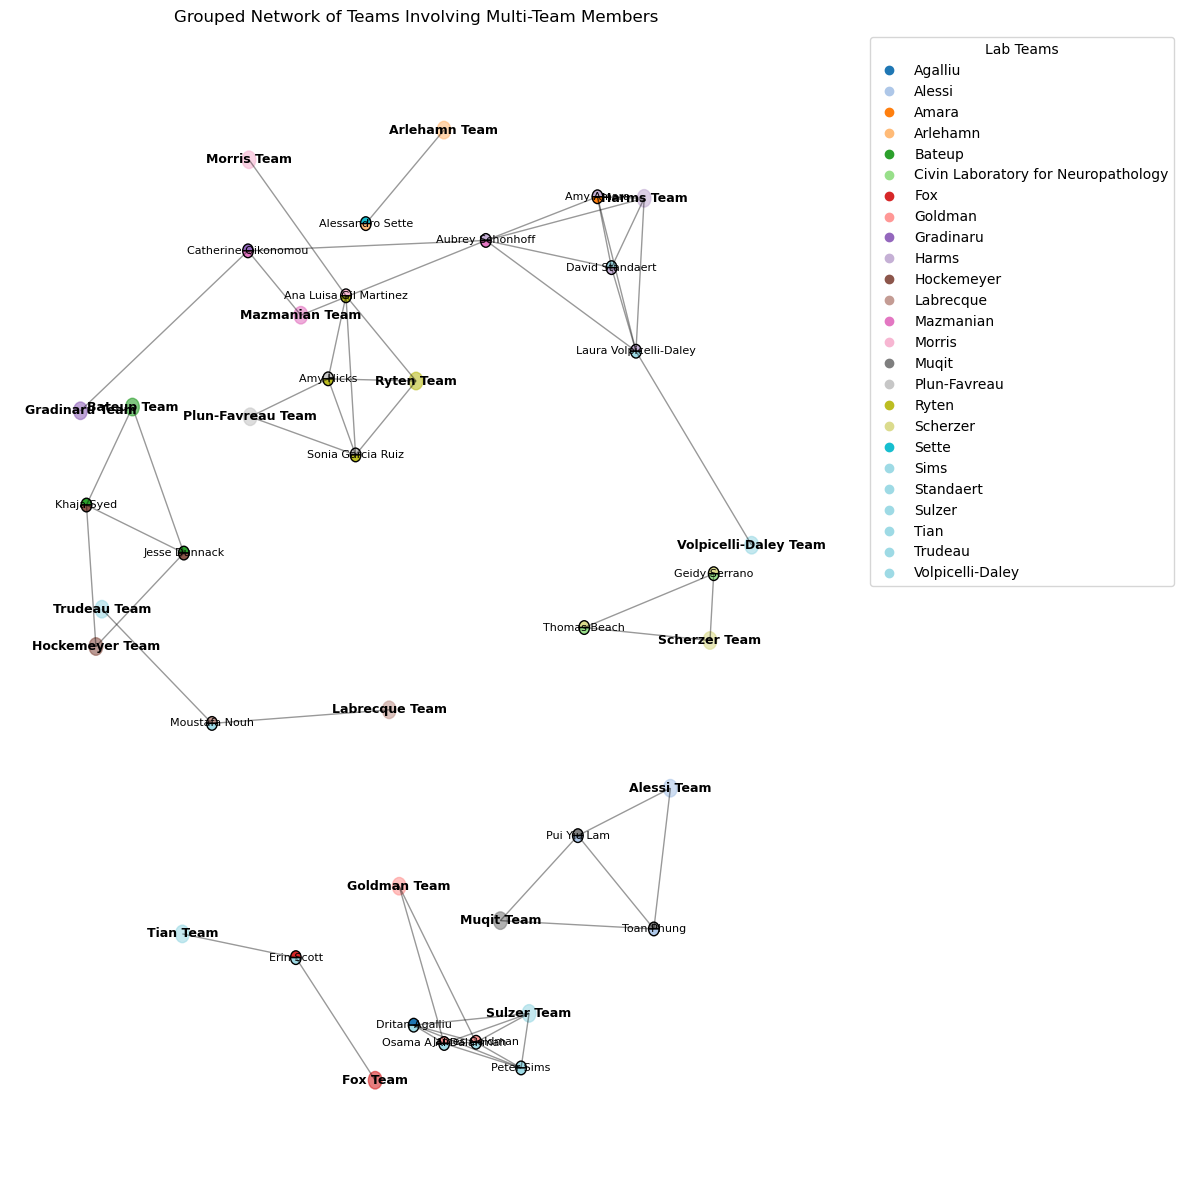

In [40]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# --- Load or define your dataframe here ---
# df = pd.read_csv("your_file.csv")

# Sample placeholder (optional)
# df = pd.DataFrame({
#     'First_Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Dana'],
#     'Last_Name': ['Smith', 'Jones', 'Brown', 'Smith', 'White'],
#     'Lab': ['LabA', 'LabA', 'LabB', 'LabB', 'LabC'],
#     'ORCID': ['0000-0001', '0000-0002', '0000-0003', '0000-0001', '0000-0001']
# })

# --- DATA CLEANING ---
df = df[df['ORCID'].notna() & df['Lab'].notna()].copy()
df['Lab'] = df['Lab'].astype(str).str.strip()
df['ORCID'] = df['ORCID'].astype(str).str.strip()
df['First_Name'] = df['First_Name'].astype(str).str.strip()
df['Last_Name'] = df['Last_Name'].astype(str).str.strip()
df['Name'] = df['First_Name'] + ' ' + df['Last_Name']

# --- FILTER: Keep only labs with at least one multi-team person ---
# 1. Identify people in multiple teams
lab_counts = df.groupby('ORCID')['Lab'].nunique()
multi_team_orcids = lab_counts[lab_counts > 1].index

# 2. Find labs that contain at least one of those people
labs_with_multi = df[df['ORCID'].isin(multi_team_orcids)]['Lab'].unique()

# 3. Filter df to only those labs
df = df[df['Lab'].isin(labs_with_multi)].copy()

# If nothing left, stop early
if df.empty:
    print("No qualifying labs found with multi-team individuals.")
else:
    # --- MAPPING & GROUPING ---
    orcid_to_name = df.drop_duplicates('ORCID')[['ORCID', 'Name']].set_index('ORCID')['Name'].to_dict()
    person_labs = df.groupby('ORCID')['Lab'].apply(set).to_dict()
    labs = sorted(df['Lab'].unique())
    lab_colors = {lab: plt.cm.tab20(i) for i, lab in enumerate(labs)}

    # --- GROUPING SINGLE-TEAM MEMBERS ---
    single_team_df = df[~df['ORCID'].isin(multi_team_orcids)]
    multi_team_df = df[df['ORCID'].isin(multi_team_orcids)]

    # Create graph
    G = nx.Graph()

    # Add group nodes for single-team people
    group_nodes = {}
    for lab, group in single_team_df.groupby('Lab'):
        group_node = f"{lab} Team"
        G.add_node(group_node, label=group_node, is_group=True, labs={lab})
        group_nodes[lab] = group_node

    # Add multi-team individual nodes
    def format_name(row):
        return f"{row['First_Name']} {row['Last_Name']}"
    multi_team_df['Label'] = multi_team_df.apply(format_name, axis=1)

    orcid_to_label = multi_team_df.drop_duplicates('ORCID')[['ORCID', 'Label']].set_index('ORCID')['Label'].to_dict()
    orcid_to_labs = multi_team_df.groupby('ORCID')['Lab'].apply(set).to_dict()

    for orcid, label in orcid_to_label.items():
        G.add_node(orcid, label=label, labs=orcid_to_labs[orcid], is_group=False)

    # Add edges between multi-team individuals in same lab
    for lab in df['Lab'].unique():
        members = multi_team_df[multi_team_df['Lab'] == lab]['ORCID'].unique()
        for i in range(len(members)):
            for j in range(i + 1, len(members)):
                G.add_edge(members[i], members[j])

    # Add edges from group nodes to multi-team individuals who share that lab
    for orcid, labs in orcid_to_labs.items():
        for lab in labs:
            if lab in group_nodes:
                G.add_edge(orcid, group_nodes[lab])

    # --- LAYOUT ---
    pos = nx.spring_layout(G, k=2, scale=5, iterations=200)

    # --- DRAW GRAPH WITH SPLIT-COLOR NODES ---
    fig, ax = plt.subplots(figsize=(12, 12))
    for node, (x, y) in pos.items():
        data = G.nodes[node]
        if data.get('is_group', False):
            # Draw group node as a larger circle
            circle = plt.Circle((x, y), 0.09, color=lab_colors[list(data['labs'])[0]], edgecolor='black', alpha=0.6)
            ax.add_patch(circle)
            ax.text(x, y, node, ha='center', va='center', fontsize=9, fontweight='bold')
        else:
            labs = list(data['labs'])
            num_labs = len(labs)
            radius = 0.07
            start_angle = 0
            for lab in labs:
                color = lab_colors[lab]
                wedge = Wedge((x, y), radius, start_angle, start_angle + 360 / num_labs,
                              facecolor=color, edgecolor='black')
                ax.add_patch(wedge)
                start_angle += 360 / num_labs
            ax.text(x, y, data['label'], ha='center', va='center', fontsize=8)

    nx.draw_networkx_edges(G, pos, alpha=0.4, ax=ax)

    # Legend
    for lab, color in lab_colors.items():
        ax.plot([], [], color=color, label=lab, marker='o', linestyle='')

    plt.legend(title="Lab Teams", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.axis('off')
    plt.title("Grouped Network of Teams Involving Multi-Team Members")
    plt.tight_layout()
    plt.show()


In [61]:
import pandas as pd
import os
from pathlib import Path

# Set the path to the folder containing the Excel files
folder_path = Path("Data/Just Teams")

# Get a list of all Excel files in the folder
excel_files = list(folder_path.glob("*.xlsx"))

combined_df = pd.DataFrame()

# Iterate through each file
for idx, file in enumerate(excel_files):
    # Read only the first 7 columns
    df = pd.read_excel(file, usecols=range(7), sheet_name=0)
    
    # For the first file, keep the original headers
    if idx == 0:
        combined_df = df.copy()
        combined_df['Team'] = file.stem  # Add 'Team' column using filename
    else:
        df.columns = combined_df.columns[:-1]  # Reuse headers from first file (excluding 'Team')
        df['Team'] = file.stem
        combined_df = pd.concat([combined_df, df], ignore_index=True)

# Final combined dataframe: combined_df


In [62]:
combined_df.to_csv("combined_teams.csv", index=False)

In [6]:
new_df = pd.read_csv("combined_teams.csv")

In [7]:
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders

In [8]:
combined_teams=new_df

In [15]:
from pyalex import config

config.email = "rde6mn@virginia.edu"
config.max_retries = 5
config.retry_backoff_factor = 0.1
config.retry_http_codes = [429, 500, 503]

OBTAIN OPEN ALEXID USING ORCID AND CHECKING TO MAKE SURE FIRST NAME AND LAST NAME MATCH 

In [10]:
from tqdm import tqdm  # optional: progress bar
import pandas as pd

# Assuming Authors() returns a dictionary-like object you can index with ORCID URLs
# If it's a function that does live API calls, make sure it's efficient or cached
author_data = Authors()  # preload or initialize API access

# Add new column to hold OpenAlex ID suffix
combined_teams['OpenAlex_ID'] = None

# Dictionary to store full JSON objects for matched authors
orcid_json_dict = {}

# Iterate over DataFrame rows
for idx, row in tqdm(combined_teams.iterrows(), total=combined_teams.shape[0]):
    orcid_id = row['ORCID']
    full_name = f"{row['First Name']} {row['Last Name']}".strip()

    orcid_url = f"https://orcid.org/{orcid_id}"
    
    try:
        # Fetch data
        author_json = author_data[orcid_url]

        # Compare names (case-insensitive match)
        if author_json.get('display_name', '').strip().lower() == full_name.lower():
            # Extract suffix of OpenAlex ID
            openalex_suffix = author_json['id'].split('/')[-1]

            # Store in DataFrame
            combined_teams.at[idx, 'OpenAlex_ID'] = openalex_suffix

            # Store full JSON object in dictionary
            orcid_json_dict[orcid_id] = author_json

    except Exception as e:
        print(f"Error processing ORCID {orcid_id}: {e}")
        continue


  0%|          | 0/1483 [00:00<?, ?it/s]

  2%|▏         | 37/1483 [00:06<03:45,  6.41it/s]

Error processing ORCID 0009-0003-2364-7261: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-2364-7261


  3%|▎         | 39/1483 [00:07<03:35,  6.69it/s]

Error processing ORCID 0009-0009-9416-6151: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-9416-6151


  3%|▎         | 41/1483 [00:07<03:29,  6.89it/s]

Error processing ORCID 0009-0006-2920-392X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-2920-392X
Error processing ORCID 0009-0000-6015-1618: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-6015-1618


  3%|▎         | 44/1483 [00:07<04:36,  5.21it/s]

Error processing ORCID 0009-0000-0237-7993: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-0237-7993
Error processing ORCID 0000-0002-1356-656X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1356-656X


  4%|▍         | 58/1483 [00:11<04:25,  5.38it/s]

Error processing ORCID 0000-0003-4245-779X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4245-779X
Error processing ORCID 0000-0002-8008-7278: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-8008-7278


  4%|▍         | 60/1483 [00:11<04:04,  5.82it/s]

Error processing ORCID 0000-0001-7621-1160: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7621-1160


  4%|▍         | 61/1483 [00:11<04:01,  5.89it/s]

Error processing ORCID 0000-0001-7567-5676: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7567-5676


  4%|▍         | 63/1483 [00:12<04:12,  5.61it/s]

Error processing ORCID 0000-0002-1546-1825: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1546-1825


  5%|▍         | 68/1483 [00:13<04:29,  5.24it/s]

Error processing ORCID 0009-0007-5886-2673: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-5886-2673


  5%|▍         | 70/1483 [00:13<04:30,  5.23it/s]

Error processing ORCID 0009-0005-8313-5246: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-8313-5246


  5%|▍         | 72/1483 [00:14<04:19,  5.44it/s]

Error processing ORCID 0009-0001-5811-0187: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-5811-0187
Error processing ORCID 0009-0005-2246-787X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-2246-787X


  5%|▍         | 74/1483 [00:14<04:11,  5.61it/s]

Error processing ORCID 0009-0000-2573-6856: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-2573-6856
Error processing ORCID 0009-0003-4140-6509: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-4140-6509


  5%|▌         | 75/1483 [00:14<04:30,  5.20it/s]

Error processing ORCID 0000-0003-3749-043X.: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3749-043X.


  5%|▌         | 77/1483 [00:15<04:52,  4.81it/s]

Error processing ORCID 0009-0006-2046-295X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-2046-295X
Error processing ORCID 0009-0004-2840-5672: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-2840-5672


  5%|▌         | 79/1483 [00:15<04:26,  5.26it/s]

Error processing ORCID 0009-0000-7931-742X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-7931-742X


  5%|▌         | 80/1483 [00:15<04:55,  4.74it/s]

Error processing ORCID 0009-0003-1427-3878: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-1427-3878


  6%|▌         | 83/1483 [00:16<04:18,  5.41it/s]

Error processing ORCID 0009-0005-2603-3892: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-2603-3892
Error processing ORCID 0009-0007-8743-6446: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-8743-6446


  6%|▌         | 90/1483 [00:17<03:48,  6.09it/s]

Error processing ORCID 0000-0003-1279-471X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1279-471X


  6%|▌         | 91/1483 [00:17<03:35,  6.46it/s]

Error processing ORCID 0000-0002-3180-7400: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3180-7400


  7%|▋         | 97/1483 [00:18<03:42,  6.24it/s]

Error processing ORCID 0000-0002-0419-3351: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-0419-3351
Error processing ORCID 0000-0003-2748-1943: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2748-1943


  7%|▋         | 108/1483 [00:20<04:29,  5.10it/s]

Error processing ORCID 0000-0001-9901-205X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9901-205X
Error processing ORCID 0000-0002-2399-025X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2399-025X


  7%|▋         | 110/1483 [00:21<04:09,  5.51it/s]

Error processing ORCID 0000-0001-9115-538X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9115-538X
Error processing ORCID 000-0003-0679-3569: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/000-0003-0679-3569


  8%|▊         | 119/1483 [00:22<03:47,  5.99it/s]

Error processing ORCID 0009-0004-5619-3152: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-5619-3152


  8%|▊         | 122/1483 [00:23<03:43,  6.09it/s]

Error processing ORCID 0009-0000-5276-2857: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-5276-2857


  8%|▊         | 125/1483 [00:23<03:37,  6.24it/s]

Error processing ORCID 0009-0006-7951-9180: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7951-9180


  9%|▊         | 129/1483 [00:24<03:26,  6.56it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


  9%|▉         | 137/1483 [00:25<04:10,  5.38it/s]

Error processing ORCID 0000-0003-1617-9562: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1617-9562


 10%|▉         | 143/1483 [00:26<04:01,  5.54it/s]

Error processing ORCID 0000-0002-6468-4283.: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6468-4283.
Error processing ORCID 0000-0002-1545-1547: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1545-1547


 10%|█         | 151/1483 [00:28<03:26,  6.44it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0000-0002-9003-9472: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9003-9472


 11%|█         | 157/1483 [00:29<03:43,  5.92it/s]

Error processing ORCID 0000-0003-3325-8684: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3325-8684


 11%|█         | 159/1483 [00:29<03:29,  6.31it/s]

Error processing ORCID 0009-0001-6223-9338: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-6223-9338
Error processing ORCID 0009-0009-8953-5661: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-8953-5661


 11%|█         | 161/1483 [00:29<03:28,  6.33it/s]

Error processing ORCID 0000-0002-2729-9837: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2729-9837


 11%|█         | 165/1483 [00:30<04:25,  4.96it/s]

Error processing ORCID 0009-0001-5148-5269: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-5148-5269


 11%|█▏        | 167/1483 [00:31<03:53,  5.65it/s]

Error processing ORCID 0009-0008-8441-4003: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-8441-4003
Error processing ORCID 0000-0003-4802-1516: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4802-1516


 11%|█▏        | 170/1483 [00:31<03:54,  5.61it/s]

Error processing ORCID 0000-0001-7788-7891: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7788-7891


 12%|█▏        | 173/1483 [00:32<03:50,  5.68it/s]

Error processing ORCID 0009-0006-9078-1868: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-9078-1868
Error processing ORCID 0000-0001-5482-2817: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-5482-2817


 13%|█▎        | 188/1483 [00:34<03:58,  5.43it/s]

Error processing ORCID 0000-0002-6102-4116: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6102-4116
Error processing ORCID 0000-0001-8257-3507: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8257-3507


 13%|█▎        | 190/1483 [00:35<03:40,  5.86it/s]

Error processing ORCID 0000-0002-7153-2464: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7153-2464


 13%|█▎        | 194/1483 [00:35<03:36,  5.95it/s]

Error processing ORCID 0000-0001-7308-4637: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7308-4637


 13%|█▎        | 200/1483 [00:36<03:53,  5.51it/s]

Error processing ORCID 0000-0003-2519-9709: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2519-9709


 14%|█▍        | 204/1483 [00:37<03:40,  5.81it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 14%|█▍        | 209/1483 [00:38<03:45,  5.66it/s]

Error processing ORCID 0000-0002-9486-121X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9486-121X


 15%|█▍        | 219/1483 [00:40<03:50,  5.48it/s]

Error processing ORCID 0000-0001-9305-1621: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9305-1621


 15%|█▍        | 222/1483 [00:41<03:37,  5.80it/s]

Error processing ORCID 0000-0003-2357-2549: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2357-2549
Error processing ORCID 0000-0002-4291-704X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-4291-704X


 15%|█▌        | 227/1483 [00:42<03:25,  6.10it/s]

Error processing ORCID 0009-0002-0221-9017: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-0221-9017
Error processing ORCID 0000-0003-3846-8111: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3846-8111


 15%|█▌        | 229/1483 [00:42<03:26,  6.08it/s]

Error processing ORCID  0009-0002-5019-0319: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/%200009-0002-5019-0319


 16%|█▌        | 232/1483 [00:42<03:16,  6.36it/s]

Error processing ORCID 0009-0001-4338-808X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-4338-808X


 16%|█▌        | 234/1483 [00:43<03:08,  6.61it/s]

Error processing ORCID 0000-0003-0695-0827: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0695-0827


 16%|█▌        | 236/1483 [00:43<03:15,  6.39it/s]

Error processing ORCID 0000-0002-2436-7638: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2436-7638


 16%|█▌        | 238/1483 [00:43<03:31,  5.88it/s]

Error processing ORCID 0009-0006-0880-0805: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-0880-0805


 17%|█▋        | 248/1483 [00:45<03:37,  5.68it/s]

Error processing ORCID 0009-0007-3545-8264: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-3545-8264


 17%|█▋        | 252/1483 [00:46<03:21,  6.10it/s]

Error processing ORCID 0000-0001-9417-5212: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9417-5212


 17%|█▋        | 255/1483 [00:46<03:42,  5.51it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 17%|█▋        | 256/1483 [00:47<05:23,  3.80it/s]

Error processing ORCID 0009-0007-9531-8837: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-9531-8837


 18%|█▊        | 260/1483 [00:48<03:42,  5.49it/s]

Error processing ORCID 0000-0003-1826-4883: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1826-4883


 18%|█▊        | 262/1483 [00:48<03:54,  5.20it/s]

Error processing ORCID 0009-0008-6589-9172: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-6589-9172


 18%|█▊        | 270/1483 [00:50<03:55,  5.15it/s]

Error processing ORCID 0000-0003-1270-5123: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1270-5123


 19%|█▊        | 276/1483 [00:51<03:29,  5.77it/s]

Error processing ORCID 0000-0001-9280-1590: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9280-1590


 19%|█▉        | 283/1483 [00:52<04:00,  4.99it/s]

Error processing ORCID 0000-0001-9522-168X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9522-168X
Error processing ORCID 0000-0002-1646-7241: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1646-7241


 19%|█▉        | 287/1483 [00:53<04:01,  4.95it/s]

Error processing ORCID 0009-0002-7018-9702: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-7018-9702


 20%|█▉        | 293/1483 [00:54<03:57,  5.01it/s]

Error processing ORCID 0009-0004-1485-7619: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-1485-7619


 20%|██        | 298/1483 [00:55<04:45,  4.15it/s]

Error processing ORCID https://orcid.org/0000-0002-8558-1734: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/https://orcid.org/0000-0002-8558-1734


 20%|██        | 302/1483 [00:56<04:28,  4.39it/s]

Error processing ORCID 0009-0006-7086-3866: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7086-3866


 21%|██▏       | 316/1483 [00:59<03:37,  5.36it/s]

Error processing ORCID 0000-0003-2585-4160: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2585-4160


 22%|██▏       | 321/1483 [01:00<03:20,  5.80it/s]

Error processing ORCID 0000-0002-2201-146X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2201-146X


 22%|██▏       | 326/1483 [01:01<03:14,  5.94it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 22%|██▏       | 328/1483 [01:01<03:12,  6.01it/s]

Error processing ORCID 0000-0003-2085-556X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2085-556X
Error processing ORCID 0000-0003-0011-3905: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0011-3905


 23%|██▎       | 335/1483 [01:02<03:29,  5.49it/s]

Error processing ORCID 0000-0003-0382-9650: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0382-9650


 23%|██▎       | 336/1483 [01:03<03:20,  5.72it/s]

Error processing ORCID 0000-0001-7442-2271: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7442-2271


 23%|██▎       | 345/1483 [01:04<03:19,  5.69it/s]

Error processing ORCID 0009-0009-8259-2612: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-8259-2612
Error processing ORCID 0009-0007-2780-3611: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-2780-3611


 25%|██▍       | 365/1483 [01:08<03:24,  5.47it/s]

Error processing ORCID 0000-0002-4215-6965: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-4215-6965
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 25%|██▍       | 370/1483 [01:09<03:20,  5.56it/s]

Error processing ORCID 0000-0002-8711-6991: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-8711-6991


 25%|██▌       | 372/1483 [01:10<03:30,  5.28it/s]

Error processing ORCID 0000-0002-9620-2568: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9620-2568


 26%|██▌       | 379/1483 [01:11<03:15,  5.66it/s]

Error processing ORCID 0000-0002-6341-6113: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6341-6113


 26%|██▌       | 384/1483 [01:12<03:21,  5.45it/s]

Error processing ORCID 0000-0002-7380-4575: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7380-4575


 26%|██▋       | 390/1483 [01:13<03:03,  5.96it/s]

Error processing ORCID 0009-0006-9274-9589: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-9274-9589
Error processing ORCID 0000-0002-1440-8424: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1440-8424


 26%|██▋       | 391/1483 [01:13<03:03,  5.95it/s]

Error processing ORCID 0009-0000-9919-4471: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-9919-4471


 27%|██▋       | 394/1483 [01:14<03:17,  5.52it/s]

Error processing ORCID 0009-0000-1102-8197: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-1102-8197
Error processing ORCID 0000-0001-8737-7019: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8737-7019


 27%|██▋       | 396/1483 [01:14<03:34,  5.07it/s]

Error processing ORCID 0009-0007-0430-8642: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-0430-8642
Error processing ORCID 0009-0000-0088-0544: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-0088-0544


 27%|██▋       | 398/1483 [01:15<04:24,  4.11it/s]

Error processing ORCID 0009-0000-9176-5524: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-9176-5524


 28%|██▊       | 412/1483 [01:17<03:22,  5.29it/s]

Error processing ORCID 0000-0002-9945-8040: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9945-8040


 28%|██▊       | 422/1483 [01:19<03:16,  5.41it/s]

Error processing ORCID 0000-0002-9715-1512: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9715-1512


 29%|██▉       | 430/1483 [01:21<03:30,  5.00it/s]

Error processing ORCID 0000-0002-4813-5006: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-4813-5006
Error processing ORCID 0000-0002-3431-007X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3431-007X


 29%|██▉       | 433/1483 [01:21<03:04,  5.70it/s]

Error processing ORCID 0009-0000-7328-1921: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-7328-1921
Error processing ORCID 0000-0002-1553-7674: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1553-7674


 30%|██▉       | 438/1483 [01:22<03:14,  5.38it/s]

Error processing ORCID 0000-0003-4197-9510: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4197-9510
Error processing ORCID 0000-0002-3703-0559: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3703-0559


 31%|███▏      | 466/1483 [01:28<03:01,  5.61it/s]

Error processing ORCID 0000-0002-1166-1125: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1166-1125
Error processing ORCID 0000-0003-0226-503X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0226-503X


 31%|███▏      | 467/1483 [01:28<03:02,  5.57it/s]

Error processing ORCID 0009-0004-5907-1804: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-5907-1804


 32%|███▏      | 478/1483 [01:30<03:22,  4.97it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 32%|███▏      | 479/1483 [01:30<03:15,  5.14it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 33%|███▎      | 493/1483 [01:33<02:52,  5.74it/s]

Error processing ORCID 0000-0003-1266-419X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1266-419X


 34%|███▍      | 502/1483 [01:35<03:05,  5.30it/s]

Error processing ORCID 0000-0001-9080-1319: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9080-1319


 35%|███▍      | 513/1483 [01:37<02:58,  5.43it/s]

Error processing ORCID 0000-0003-1675-2912: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1675-2912


 35%|███▍      | 519/1483 [01:38<03:14,  4.95it/s]

Error processing ORCID 0000-0001-6918-3974: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-6918-3974


 35%|███▌      | 521/1483 [01:39<02:45,  5.81it/s]

Error processing ORCID 0000-0003-2217-4725 : 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2217-4725%20
Error processing ORCID 0000-0002-7069-5616. : 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7069-5616.%20


 35%|███▌      | 525/1483 [01:39<02:36,  6.11it/s]

Error processing ORCID 0000-0001-7711-8806: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7711-8806


 36%|███▌      | 528/1483 [01:40<02:35,  6.13it/s]

Error processing ORCID 0000-0001-5321-0536: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-5321-0536


 36%|███▌      | 531/1483 [01:40<02:48,  5.64it/s]

Error processing ORCID 0009-0007-6803-1152: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-6803-1152


 36%|███▌      | 534/1483 [01:41<02:35,  6.09it/s]

Error processing ORCID 0009-0006-8383-5717: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-8383-5717
Error processing ORCID 0000-0001-9466-979X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9466-979X


 38%|███▊      | 559/1483 [01:46<02:32,  6.04it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 38%|███▊      | 563/1483 [01:47<03:11,  4.81it/s]

Error processing ORCID 0000-0001-8858-7798: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8858-7798


 38%|███▊      | 565/1483 [01:47<02:56,  5.20it/s]

Error processing ORCID 0000-0001-9431-4251: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9431-4251


 38%|███▊      | 569/1483 [01:48<02:48,  5.44it/s]

Error processing ORCID 0000-0001-8828-835X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8828-835X
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 39%|███▉      | 576/1483 [01:49<02:46,  5.45it/s]

Error processing ORCID 0009-0009-2901-3001: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-2901-3001


 39%|███▉      | 582/1483 [01:50<02:50,  5.30it/s]

Error processing ORCID 0009-0009-2322-6938: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-2322-6938
Error processing ORCID 0009-0006-7900-489X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7900-489X


 40%|███▉      | 593/1483 [01:52<02:22,  6.25it/s]

Error processing ORCID 0000-0003-3715-4479: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3715-4479


 41%|████      | 611/1483 [01:55<02:22,  6.10it/s]

Error processing ORCID 0009-0007-1500-9584: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-1500-9584


 42%|████▏     | 616/1483 [01:56<02:21,  6.14it/s]

Error processing ORCID 0009-0001-7553-0124: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-7553-0124


 42%|████▏     | 617/1483 [01:56<02:13,  6.48it/s]

Error processing ORCID 0009 0001 7290 8638: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009%200001%207290%208638


 42%|████▏     | 622/1483 [01:58<02:37,  5.46it/s]

Error processing ORCID 0009-0007-1179-5901: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-1179-5901
Error processing ORCID 0009-0007-9374-4584: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-9374-4584


 42%|████▏     | 624/1483 [01:58<02:22,  6.04it/s]

Error processing ORCID 0009-0001-6788-4205: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-6788-4205


 44%|████▎     | 646/1483 [02:02<02:23,  5.83it/s]

Error processing ORCID 0000-0003-4585-5996: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4585-5996


 44%|████▍     | 649/1483 [02:02<02:12,  6.31it/s]

Error processing ORCID 0000-0001-6279-6671: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-6279-6671
Error processing ORCID 0009-0009-3536-0106: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-3536-0106


 44%|████▍     | 653/1483 [02:03<02:11,  6.29it/s]

Error processing ORCID 0009-0004-7813-193X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-7813-193X


 44%|████▍     | 658/1483 [02:04<02:13,  6.19it/s]

Error processing ORCID 0000-0001-9029-9662: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9029-9662


 45%|████▍     | 660/1483 [02:04<02:08,  6.38it/s]

Error processing ORCID 0000-0002-0864-5239: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-0864-5239
Error processing ORCID 0000-0002-6956-6032: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6956-6032


 45%|████▍     | 664/1483 [02:05<02:19,  5.85it/s]

Error processing ORCID 0000-0002-2254-3845: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2254-3845


 45%|████▌     | 669/1483 [02:06<02:01,  6.71it/s]

Error processing ORCID 0009-0006-7070-3547: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7070-3547


 46%|████▌     | 680/1483 [02:08<02:20,  5.72it/s]

Error processing ORCID 0000-0001-5779-5906: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-5779-5906
Error processing ORCID 0000-0003-4578-9298: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4578-9298


 46%|████▋     | 686/1483 [02:09<02:21,  5.65it/s]

Error processing ORCID 0009-0002-6432-6002: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-6432-6002
Error processing ORCID 0009-0002-9123-2378: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-9123-2378


 47%|████▋     | 694/1483 [02:10<02:19,  5.67it/s]

Error processing ORCID 0000-0003-0269-9073: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0269-9073


 48%|████▊     | 706/1483 [02:13<02:26,  5.32it/s]

Error processing ORCID 0000-0003-4318-0331: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4318-0331
Error processing ORCID 0000-0001-8287-4075: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8287-4075


 48%|████▊     | 708/1483 [02:13<02:41,  4.80it/s]

Error processing ORCID 0000-0002-1925-5316: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1925-5316


 48%|████▊     | 713/1483 [02:14<02:03,  6.23it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0009-0009-9217-9442: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-9217-9442


 48%|████▊     | 717/1483 [02:14<02:01,  6.31it/s]

Error processing ORCID 0009-0000-0088-0544: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-0088-0544


 49%|████▉     | 724/1483 [02:16<02:24,  5.25it/s]

Error processing ORCID 0000-0002-9112-6295: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9112-6295


 49%|████▉     | 727/1483 [02:16<02:14,  5.61it/s]

Error processing ORCID 0000-0002-6119-1125: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6119-1125
Error processing ORCID 0000-0002-2351-3728: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2351-3728


 49%|████▉     | 731/1483 [02:17<01:52,  6.66it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 49%|████▉     | 733/1483 [02:17<01:58,  6.35it/s]

Error processing ORCID 0000-0003-3734-4598: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3734-4598


 50%|████▉     | 738/1483 [02:18<02:04,  6.01it/s]

Error processing ORCID 0009-0005-8892-9053: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-8892-9053
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 50%|████▉     | 740/1483 [02:18<02:04,  5.98it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0000-0003-4727-8547: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4727-8547


 50%|█████     | 742/1483 [02:19<01:57,  6.30it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 50%|█████     | 744/1483 [02:19<02:00,  6.13it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 50%|█████     | 746/1483 [02:20<02:25,  5.07it/s]

Error processing ORCID 0009-0009-4597-8217: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-4597-8217


 51%|█████     | 752/1483 [02:20<01:58,  6.18it/s]

Error processing ORCID 0000-0002-1901-4037: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1901-4037


 51%|█████     | 755/1483 [02:21<02:14,  5.41it/s]

Error processing ORCID 0000-0002-1445-0235: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1445-0235


 51%|█████     | 759/1483 [02:22<02:06,  5.72it/s]

Error processing ORCID 0000-0002-8949-6158: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-8949-6158
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 51%|█████▏    | 761/1483 [02:22<01:58,  6.10it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 51%|█████▏    | 763/1483 [02:22<01:57,  6.12it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 52%|█████▏    | 765/1483 [02:23<02:16,  5.28it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 52%|█████▏    | 767/1483 [02:23<02:06,  5.67it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 52%|█████▏    | 768/1483 [02:23<02:05,  5.71it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 52%|█████▏    | 773/1483 [02:24<01:58,  6.01it/s]

Error processing ORCID 0009-0007-3408-4993: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-3408-4993


 52%|█████▏    | 777/1483 [02:25<01:50,  6.40it/s]

Error processing ORCID 0009-0004-1298-979x: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-1298-979x
Error processing ORCID 0009-0001-3419-3969: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-3419-3969


 53%|█████▎    | 780/1483 [02:25<01:58,  5.92it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0009-0001-3140-9744: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-3140-9744


 53%|█████▎    | 781/1483 [02:26<01:53,  6.18it/s]

Error processing ORCID 0009-0001-3419-3969: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-3419-3969


 53%|█████▎    | 788/1483 [02:27<02:07,  5.47it/s]

Error processing ORCID 0000-0002-4723-9209: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-4723-9209


 54%|█████▍    | 802/1483 [02:30<02:03,  5.53it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 54%|█████▍    | 803/1483 [02:30<02:11,  5.15it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 54%|█████▍    | 804/1483 [02:30<02:16,  4.98it/s]

Error processing ORCID 0000-0002-2069-9790: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2069-9790


 55%|█████▍    | 811/1483 [02:31<02:16,  4.93it/s]

Error processing ORCID 0009-0004-1910-1773: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-1910-1773


 55%|█████▍    | 814/1483 [02:32<02:04,  5.36it/s]

Error processing ORCID 0009-0008-8628-9752: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-8628-9752


 55%|█████▌    | 818/1483 [02:33<01:57,  5.68it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 55%|█████▌    | 821/1483 [02:33<02:03,  5.36it/s]

Error processing ORCID 0009-0008-3476-0231: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-3476-0231


 56%|█████▌    | 831/1483 [02:35<01:55,  5.63it/s]

Error processing ORCID 0000-0003-0888-8238: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0888-8238
Error processing ORCID https://orcid.org/0000-0002-1964-6886: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/https://orcid.org/0000-0002-1964-6886


 56%|█████▋    | 837/1483 [02:36<01:55,  5.58it/s]

Error processing ORCID 0009-0000-8240-0152: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-8240-0152


 57%|█████▋    | 838/1483 [02:36<01:51,  5.77it/s]

Error processing ORCID 0000-0003-1702-9347: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1702-9347


 58%|█████▊    | 856/1483 [02:40<01:54,  5.49it/s]

Error processing ORCID 0000-0002-1569-6587: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1569-6587
Error processing ORCID 0000-0002-2059-813X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2059-813X


 58%|█████▊    | 864/1483 [02:42<01:51,  5.56it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 59%|█████▊    | 871/1483 [02:43<02:06,  4.84it/s]

Error processing ORCID 0009-0009-8124-5942: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-8124-5942


 59%|█████▉    | 875/1483 [02:44<01:47,  5.67it/s]

Error processing ORCID 0009-0001-2779-2082: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-2779-2082
Error processing ORCID 0009-0002-3038-7659: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-3038-7659


 59%|█████▉    | 877/1483 [02:44<01:47,  5.65it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 59%|█████▉    | 878/1483 [02:44<01:41,  5.96it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 59%|█████▉    | 880/1483 [02:44<01:43,  5.82it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 59%|█████▉    | 882/1483 [02:45<01:41,  5.93it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|█████▉    | 884/1483 [02:45<02:08,  4.64it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|█████▉    | 886/1483 [02:46<01:48,  5.52it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|█████▉    | 888/1483 [02:46<01:37,  6.10it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|██████    | 890/1483 [02:46<01:38,  6.04it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|██████    | 892/1483 [02:47<01:40,  5.86it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|██████    | 894/1483 [02:47<01:38,  6.00it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 60%|██████    | 896/1483 [02:47<01:34,  6.22it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 61%|██████    | 898/1483 [02:48<01:36,  6.04it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 61%|██████▏   | 909/1483 [02:50<01:45,  5.46it/s]

Error processing ORCID 0000-0001-8460-6445: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8460-6445


 64%|██████▎   | 943/1483 [02:56<01:35,  5.67it/s]

Error processing ORCID 0000-0002-9940-7750: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9940-7750


 64%|██████▎   | 945/1483 [02:56<01:33,  5.78it/s]

Error processing ORCID 0000-0003-1642-8370: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1642-8370


 64%|██████▍   | 946/1483 [02:56<01:31,  5.87it/s]

Error processing ORCID 0009-0008-6632-4653: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-6632-4653


 64%|██████▍   | 950/1483 [02:57<01:30,  5.89it/s]

Error processing ORCID 0009-0004-2441-6091: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-2441-6091


 64%|██████▍   | 952/1483 [02:57<01:27,  6.09it/s]

Error processing ORCID 0009-0007-4646-132X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-4646-132X
Error processing ORCID 0009-0007-5595-9066: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-5595-9066


 64%|██████▍   | 954/1483 [02:58<01:32,  5.72it/s]

Error processing ORCID 0009-0002-9721-9588: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-9721-9588
Error processing ORCID pending: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/pending


 65%|██████▍   | 957/1483 [02:58<01:30,  5.84it/s]

Error processing ORCID pending: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/pending


 65%|██████▍   | 959/1483 [02:59<01:30,  5.79it/s]

Error processing ORCID 0009-0008-5849-9904: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-5849-9904
Error processing ORCID 0009-0003-1751-2379: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-1751-2379


 65%|██████▍   | 960/1483 [02:59<01:31,  5.74it/s]

Error processing ORCID 0009-0009-6819-6496: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-6819-6496


 65%|██████▍   | 962/1483 [02:59<01:34,  5.50it/s]

Error processing ORCID 0009-0009-6370-6872: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-6370-6872
Error processing ORCID 0009-0005-4430-7914.: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-4430-7914.


 65%|██████▍   | 963/1483 [02:59<01:34,  5.52it/s]

Error processing ORCID 0009-0009-3426-2897: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-3426-2897


 65%|██████▌   | 965/1483 [03:00<01:39,  5.19it/s]

Error processing ORCID 0009-0001-1938-7108: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-1938-7108


 65%|██████▌   | 969/1483 [03:00<01:30,  5.65it/s]

Error processing ORCID 0000-0003-0563-5147: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0563-5147


 66%|██████▌   | 975/1483 [03:02<01:39,  5.12it/s]

Error processing ORCID 0000-0002-1537-4000: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1537-4000


 66%|██████▌   | 978/1483 [03:02<01:36,  5.24it/s]

Error processing ORCID 0000-0003-3770-1102: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3770-1102


 66%|██████▋   | 983/1483 [03:03<01:24,  5.89it/s]

Error processing ORCID 0000-0002-2060-3023: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2060-3023


 67%|██████▋   | 987/1483 [03:04<01:35,  5.22it/s]

Error processing ORCID 0009-0008-7071-9690: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-7071-9690


 67%|██████▋   | 989/1483 [03:04<01:37,  5.06it/s]

Error processing ORCID 0009-0004-5613-5825: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-5613-5825


 67%|██████▋   | 990/1483 [03:04<01:33,  5.27it/s]

Error processing ORCID 0009-0006-7239-6667: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7239-6667


 67%|██████▋   | 996/1483 [03:05<01:26,  5.66it/s]

Error processing ORCID 0009-0002-3920-0467: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-3920-0467
Error processing ORCID 0009-0007-4153-901X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-4153-901X


 67%|██████▋   | 998/1483 [03:06<01:21,  5.92it/s]

Error processing ORCID 0009-0005-2106-7401: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-2106-7401
Error processing ORCID 0009-0001-0822-8988: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-0822-8988


 67%|██████▋   | 1001/1483 [03:06<01:19,  6.06it/s]

Error processing ORCID 0009-0006-7761-4096: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-7761-4096
Error processing ORCID 0000-0002-7027-0570: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7027-0570


 68%|██████▊   | 1005/1483 [03:07<01:23,  5.73it/s]

Error processing ORCID 0000-0002-2799-7336: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2799-7336
Error processing ORCID 0000-0003-4567-6939: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4567-6939


 68%|██████▊   | 1006/1483 [03:07<01:23,  5.69it/s]

Error processing ORCID 0009-0006-6241-0373: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-6241-0373


 68%|██████▊   | 1008/1483 [03:08<01:29,  5.32it/s]

Error processing ORCID 0000-0001-8897-6638: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8897-6638
Error processing ORCID 0009-0000-3571-6541: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-3571-6541


 69%|██████▊   | 1016/1483 [03:09<01:19,  5.88it/s]

Error processing ORCID 0009-0003-3752-5660: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-3752-5660
Error processing ORCID 0009-0006-4138-1200: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-4138-1200


 70%|██████▉   | 1035/1483 [03:12<01:20,  5.59it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 70%|██████▉   | 1037/1483 [03:13<01:11,  6.22it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 70%|███████   | 1043/1483 [03:14<01:35,  4.58it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 71%|███████   | 1047/1483 [03:15<01:17,  5.64it/s]

Error processing ORCID 0000-0002-5601-4693: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-5601-4693
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 71%|███████   | 1049/1483 [03:15<01:14,  5.79it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0000-0002-5874-5158: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-5874-5158


 71%|███████   | 1051/1483 [03:15<01:11,  6.02it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0000-0002-8647-7787: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-8647-7787


 71%|███████   | 1055/1483 [03:16<01:16,  5.57it/s]

Error processing ORCID 0000-0002-1841-5955: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1841-5955
Error processing ORCID 0009-0001-4186-111X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-4186-111X


 71%|███████▏  | 1057/1483 [03:16<01:09,  6.16it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 71%|███████▏  | 1058/1483 [03:16<01:07,  6.27it/s]

Error processing ORCID 0009-0008-7729-0372: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-7729-0372


 71%|███████▏  | 1060/1483 [03:17<01:21,  5.20it/s]

Error processing ORCID 0000-0003-1821-9126: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1821-9126


 72%|███████▏  | 1061/1483 [03:17<01:15,  5.62it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 72%|███████▏  | 1065/1483 [03:18<01:07,  6.21it/s]

Error processing ORCID 0009-0006-6666-2586: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-6666-2586
Error processing ORCID 0009-0002-2343-0903: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-2343-0903


 72%|███████▏  | 1069/1483 [03:18<01:09,  5.99it/s]

Error processing ORCID 0000-0002-0389-982X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-0389-982X


 72%|███████▏  | 1075/1483 [03:20<01:15,  5.42it/s]

Error processing ORCID 0000-0002-3447-9801: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3447-9801


 73%|███████▎  | 1080/1483 [03:20<01:08,  5.87it/s]

Error processing ORCID 0000-0002-2066-1151: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2066-1151


 73%|███████▎  | 1088/1483 [03:22<00:58,  6.75it/s]

Error processing ORCID 0000-0002-3422-987X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3422-987X
Error processing ORCID 0000-0001-7721-8989: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7721-8989


 73%|███████▎  | 1090/1483 [03:22<01:00,  6.53it/s]

Error processing ORCID 0000-0002-7114-893X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7114-893X
Error processing ORCID 0000-0002-8098-7532: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-8098-7532


 74%|███████▎  | 1093/1483 [03:22<01:01,  6.32it/s]

Error processing ORCID 0009-0004-5400-2105: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-5400-2105


 74%|███████▍  | 1098/1483 [03:23<01:00,  6.35it/s]

Error processing ORCID 0009-0008-9832-1190: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-9832-1190
Error processing ORCID 0009-0002-7415-7935: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-7415-7935


 74%|███████▍  | 1100/1483 [03:24<00:59,  6.44it/s]

Error processing ORCID 0009-0002-3454-8210: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-3454-8210


 74%|███████▍  | 1102/1483 [03:24<00:58,  6.48it/s]

Error processing ORCID 0009-0007-3576-7104: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-3576-7104


 74%|███████▍  | 1104/1483 [03:25<01:32,  4.08it/s]

Error processing ORCID 0009-0006-3475-9631: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-3475-9631
Error processing ORCID 0009-0002-9833-4166: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-9833-4166


 75%|███████▍  | 1106/1483 [03:25<01:29,  4.24it/s]

Error processing ORCID 0009-0006-2336-065X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-2336-065X
Error processing ORCID 0009-0002-4571-6697: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-4571-6697


 75%|███████▍  | 1108/1483 [03:25<01:11,  5.21it/s]

Error processing ORCID 0009-0009-8206-1125: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-8206-1125


 75%|███████▍  | 1111/1483 [03:26<01:03,  5.83it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID 0000-0002-6788-5611: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6788-5611


 75%|███████▌  | 1114/1483 [03:26<01:05,  5.67it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 75%|███████▌  | 1116/1483 [03:27<01:10,  5.22it/s]

Error processing ORCID 0000-0003-3775-7018: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3775-7018


 76%|███████▌  | 1123/1483 [03:28<00:59,  6.08it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 76%|███████▌  | 1128/1483 [03:29<01:00,  5.89it/s]

Error processing ORCID 0000-0002-6313-6357: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6313-6357
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 77%|███████▋  | 1137/1483 [03:31<00:57,  5.99it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 77%|███████▋  | 1140/1483 [03:31<00:54,  6.30it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 77%|███████▋  | 1142/1483 [03:31<00:53,  6.33it/s]

Error processing ORCID 0000-0002-5741-6555: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-5741-6555
Error processing ORCID 0000-0003-2883-0893: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2883-0893


 77%|███████▋  | 1144/1483 [03:32<01:00,  5.58it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 77%|███████▋  | 1148/1483 [03:32<00:59,  5.66it/s]

Error processing ORCID 0009-0007-5186-6401: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-5186-6401


 77%|███████▋  | 1149/1483 [03:33<00:57,  5.77it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 78%|███████▊  | 1152/1483 [03:34<02:11,  2.52it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 78%|███████▊  | 1160/1483 [03:36<01:15,  4.29it/s]

Error processing ORCID 0000-0001-9031-6356: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9031-6356


 78%|███████▊  | 1162/1483 [03:36<01:03,  5.05it/s]

Error processing ORCID 0009-0001-5007-4548: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-5007-4548


 79%|███████▉  | 1178/1483 [03:39<00:56,  5.36it/s]

Error processing ORCID 0000-0003-3734-4598: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-3734-4598


 80%|███████▉  | 1182/1483 [03:40<00:51,  5.90it/s]

Error processing ORCID 0000-0001-7186-8681: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7186-8681


 80%|████████  | 1188/1483 [03:41<01:04,  4.61it/s]

Error processing ORCID 0000-0002-1553-7674: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1553-7674
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 80%|████████  | 1190/1483 [03:42<00:55,  5.26it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 80%|████████  | 1191/1483 [03:42<00:52,  5.54it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 81%|████████  | 1204/1483 [03:44<00:51,  5.41it/s]

Error processing ORCID 0000-0001-9063-5963: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9063-5963


 81%|████████▏ | 1208/1483 [03:45<00:45,  6.08it/s]

Error processing ORCID 0000-0001-6205-7721: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-6205-7721
Error processing ORCID 0000-0002-7112-4401: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-7112-4401


 82%|████████▏ | 1210/1483 [03:45<00:46,  5.91it/s]

Error processing ORCID 0000-0003-4517-4349: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4517-4349


 82%|████████▏ | 1218/1483 [03:47<00:49,  5.36it/s]

Error processing ORCID 0009-0008-2213-898X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0008-2213-898X
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 82%|████████▏ | 1220/1483 [03:47<00:47,  5.55it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 82%|████████▏ | 1223/1483 [03:48<00:41,  6.24it/s]

Error processing ORCID 000-0003-3369-6318: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/000-0003-3369-6318


 83%|████████▎ | 1229/1483 [03:49<00:40,  6.25it/s]

Error processing ORCID 0009-0000-6880-3190: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-6880-3190


 84%|████████▎ | 1242/1483 [03:51<00:40,  5.96it/s]

Error processing ORCID 0000-0002-1378-1112: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1378-1112


 85%|████████▌ | 1267/1483 [03:56<00:41,  5.23it/s]

Error processing ORCID 0000-0002-2053-7572: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-2053-7572
Error processing ORCID 0000-0003-4888-2869: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4888-2869


 86%|████████▌ | 1272/1483 [03:56<00:35,  5.93it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 86%|████████▌ | 1275/1483 [03:57<00:34,  5.99it/s]

Error processing ORCID to be generated: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/to%20be%20generated
Error processing ORCID 0000-0001-5174-3021: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-5174-3021


 86%|████████▌ | 1277/1483 [03:57<00:34,  5.90it/s]

Error processing ORCID 0009-0006-3920-1477: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-3920-1477
Error processing ORCID 0009-0001-3864-2629: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-3864-2629


 86%|████████▌ | 1279/1483 [03:58<00:39,  5.20it/s]

Error processing ORCID 0009-0006-3088-7337: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-3088-7337
Error processing ORCID 0009-0002-7711-3559: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-7711-3559


 86%|████████▋ | 1282/1483 [03:58<00:34,  5.87it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 87%|████████▋ | 1285/1483 [03:59<00:30,  6.52it/s]

Error processing ORCID 0009-0007-9297-1988: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-9297-1988
Error processing ORCID 0009-0007-6270-6040: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-6270-6040


 87%|████████▋ | 1289/1483 [03:59<00:36,  5.29it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 88%|████████▊ | 1306/1483 [04:02<00:28,  6.31it/s]

Error processing ORCID 0000-0002-9583-5451: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9583-5451
Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 88%|████████▊ | 1309/1483 [04:03<00:25,  6.74it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 90%|████████▉ | 1331/1483 [04:06<00:24,  6.19it/s]

Error processing ORCID 0000-0003-4631-9562: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4631-9562


 90%|████████▉ | 1333/1483 [04:07<00:23,  6.44it/s]

Error processing ORCID 0000-0002-4704-5834: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-4704-5834


 91%|█████████ | 1347/1483 [04:09<00:22,  6.15it/s]

Error processing ORCID 0000-0002-6337-9797: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6337-9797


 91%|█████████ | 1348/1483 [04:09<00:23,  5.78it/s]

Error processing ORCID 0000-0001-7732-6103: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7732-6103


 91%|█████████ | 1352/1483 [04:10<00:23,  5.67it/s]

Error processing ORCID 0009-0000-0088-0544: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-0088-0544
Error processing ORCID 0009-0003-8416-0369: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-8416-0369


 91%|█████████ | 1353/1483 [04:10<00:22,  5.65it/s]

Error processing ORCID 0009-0002-8841-5368: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-8841-5368


 91%|█████████▏| 1354/1483 [04:10<00:24,  5.32it/s]

Error processing ORCID 0009-0002-0518-1333: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-0518-1333
Error processing ORCID 0009-0007-8353-4049: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-8353-4049


 92%|█████████▏| 1358/1483 [04:11<00:21,  5.80it/s]

Error processing ORCID 000-0003-1204-9963: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/000-0003-1204-9963


 92%|█████████▏| 1371/1483 [04:13<00:18,  5.96it/s]

Error processing ORCID 0000-0003-0406-0628: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0406-0628


 93%|█████████▎| 1373/1483 [04:13<00:16,  6.52it/s]

Error processing ORCID 0000-0002-3429-0531: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3429-0531


 94%|█████████▍| 1391/1483 [04:17<00:15,  5.78it/s]

Error processing ORCID 0000-0001-6739-572X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-6739-572X


 94%|█████████▍| 1395/1483 [04:17<00:15,  5.85it/s]

Error processing ORCID nan: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/nan


 94%|█████████▍| 1397/1483 [04:18<00:14,  6.01it/s]

Error processing ORCID 0000-0002-3293-6167: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-3293-6167


 94%|█████████▍| 1400/1483 [04:18<00:13,  6.13it/s]

Error processing ORCID 0000-0001-8534-5988: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8534-5988


 95%|█████████▍| 1403/1483 [04:19<00:13,  5.78it/s]

Error processing ORCID 0009-0006-4409-8523: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-4409-8523
Error processing ORCID 0009-0001-0459-9837: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-0459-9837


 95%|█████████▌| 1413/1483 [04:21<00:12,  5.40it/s]

Error processing ORCID 0000-0001-9958-5624: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-9958-5624


 96%|█████████▌| 1421/1483 [04:22<00:09,  6.64it/s]

Error processing ORCID 0000-0003-4147-7967: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-4147-7967


 97%|█████████▋| 1432/1483 [04:24<00:09,  5.25it/s]

Error processing ORCID 0009-0002-9069-4888: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0002-9069-4888
Error processing ORCID 0009-0007-8733-0318: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0007-8733-0318


 97%|█████████▋| 1434/1483 [04:24<00:09,  5.05it/s]

Error processing ORCID 0009-0004-6299-4167: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0004-6299-4167


 97%|█████████▋| 1436/1483 [04:25<00:08,  5.55it/s]

Error processing ORCID 0009-0001-8248-4912: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0001-8248-4912
Error processing ORCID 0009-0003-2001-2738: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-2001-2738


 97%|█████████▋| 1445/1483 [04:26<00:05,  6.51it/s]

Error processing ORCID 0000-0003-1266-419X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1266-419X


 98%|█████████▊| 1451/1483 [04:27<00:05,  5.84it/s]

Error processing ORCID 0000-0003-2400-2230: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-2400-2230


 99%|█████████▊| 1462/1483 [04:29<00:03,  5.89it/s]

Error processing ORCID 0000-0002-9155-1961: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-9155-1961


 99%|█████████▉| 1468/1483 [04:30<00:02,  5.87it/s]

Error processing ORCID 0000-0001-7593-1916: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7593-1916


 99%|█████████▉| 1470/1483 [04:30<00:02,  5.77it/s]

Error processing ORCID 0000-0001-8980-837X: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8980-837X


 99%|█████████▉| 1474/1483 [04:31<00:01,  5.98it/s]

Error processing ORCID 0000-0001-7311-1797: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-7311-1797


100%|█████████▉| 1481/1483 [04:32<00:00,  5.73it/s]

Error processing ORCID 0000-0003-1755-7692: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-1755-7692


100%|██████████| 1483/1483 [04:33<00:00,  5.43it/s]

Error processing ORCID 0009-0005-6875-3636: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0005-6875-3636


In [12]:
print(combined_teams.head())  # Display the first few rows of the updated DataFrame

      Last Name First Name           Role  \
0        Alessi      Dario        Lead-PI   
1  Abu-Remaileh    Monther          Co-PI   
2         Muqit    Miratul          Co-PI   
3       Pfeffer    Suzanne          Co-PI   
4       Tonelli  Francesca  Key Personnel   

  Lab \n(Alessi, Abu-Remaileh, Muqit, or Pfeffer)  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                          Alessi   

  Lab Role \n(grad student, postdoc, research assoc, etc.)  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                   Research Manager         

                     Email           

In [13]:
combined_teams.to_csv("combined_teams_with_openalex2.csv", index=False)

In [14]:
import pandas as pd
import pandas as pd
import os
from pathlib import Path
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
from pyalex import config
from tqdm import tqdm 
import json

In [45]:
combined_teams = pd.read_csv("combined_teams_with_openalex.csv")

In [34]:
cleaned_df['Lab'] = str(cleaned_df['Lab'])
cleaned_df['First_Name'] = str(cleaned_df['First_Name'])
cleaned_df['Last_Name'] = str(cleaned_df['Last_Name'])
combined_teams['Lab'] = str(combined_teams['Lab'])
combined_teams['First Name'] = str(combined_teams['First Name'])
combined_teams['Last Name'] = str(combined_teams['Last Name'])

Clean: Add missing Lab values

In [46]:
import pandas as pd

# Load data
cleaned_df = pd.read_csv("Data/cleaned.csv")

# Strip column names
cleaned_df.columns = cleaned_df.columns.str.strip()
combined_teams.columns = combined_teams.columns.str.strip()

# Create lowercase copies for matching (don't modify originals)
combined_teams['_fn_lc'] = combined_teams['First Name'].astype(str).str.strip().str.lower()
combined_teams['_ln_lc'] = combined_teams['Last Name'].astype(str).str.strip().str.lower()
combined_teams['_orcid_lc'] = combined_teams['ORCID'].astype(str).str.strip().str.lower()

cleaned_df['_fn_lc'] = cleaned_df['First_Name'].astype(str).str.strip().str.lower()
cleaned_df['_ln_lc'] = cleaned_df['Last_Name'].astype(str).str.strip().str.lower()
cleaned_df['_orcid_lc'] = cleaned_df['ORCID'].astype(str).str.strip().str.lower()

# Count missing Lab values before
missing_before = combined_teams['Lab'].isna().sum()
print(f"Missing 'Lab' values before update: {missing_before}")

# Fill missing Lab
missing_lab_mask = combined_teams['Lab'].isna()

for idx, row in combined_teams[missing_lab_mask].iterrows():
    fn, ln, orcid = row['_fn_lc'], row['_ln_lc'], row['_orcid_lc']

    match = cleaned_df[
        (cleaned_df['_fn_lc'] == fn) &
        (cleaned_df['_ln_lc'] == ln) &
        (cleaned_df['_orcid_lc'] == orcid)
    ]

    if not match.empty:
        combined_teams.at[idx, 'Lab'] = match.iloc[0]['Lab']

# Count missing Lab values after
missing_after = combined_teams['Lab'].isna().sum()
print(f"Missing 'Lab' values after update: {missing_after}")

# Drop temp lowercase columns
combined_teams.drop(columns=['_fn_lc', '_ln_lc', '_orcid_lc'], inplace=True)


Missing 'Lab' values before update: 76
Missing 'Lab' values after update: 34


In [47]:

combined_teams.to_csv("combined_teams_with_openalex_updated.csv", index=False)

In [52]:
combined_teams = pd.read_csv("combined_teams_with_openalex_updated.csv")

Pull ORCID from cleaned.csv if OpenAlex_ID is empty

In [53]:
import pandas as pd

# Load cleaned_df
cleaned_df = pd.read_csv("Data/cleaned.csv")

# Strip and standardize column names
cleaned_df.columns = cleaned_df.columns.str.strip()
combined_teams.columns = combined_teams.columns.str.strip()

# Create lowercase versions of key fields for matching
combined_teams['_fn_lc'] = combined_teams['First Name'].astype(str).str.strip().str.lower()
combined_teams['_ln_lc'] = combined_teams['Last Name'].astype(str).str.strip().str.lower()
combined_teams['_lab_lc'] = combined_teams['Lab'].astype(str).str.strip().str.lower()

cleaned_df['_fn_lc'] = cleaned_df['First_Name'].astype(str).str.strip().str.lower()
cleaned_df['_ln_lc'] = cleaned_df['Last_Name'].astype(str).str.strip().str.lower()
cleaned_df['_lab_lc'] = cleaned_df['Lab'].astype(str).str.strip().str.lower()

# Ensure 'OtherORCID' column exists
if 'OtherORCID' not in combined_teams.columns:
    combined_teams['OtherORCID'] = pd.NA

# Process only rows with missing OpenAlex_ID
missing_openalex_mask = combined_teams['OpenAlex_ID'].isna()

for idx, row in combined_teams[missing_openalex_mask].iterrows():
    fn = row['_fn_lc']
    ln = row['_ln_lc']
    lab = row['_lab_lc']

    # Find match in cleaned_df
    match = cleaned_df[
        (cleaned_df['_fn_lc'] == fn) &
        (cleaned_df['_ln_lc'] == ln) &
        (cleaned_df['_lab_lc'] == lab)
    ]

    if not match.empty:
        combined_teams.at[idx, 'OtherORCID'] = match.iloc[0]['ORCID']

# Drop temporary lowercase columns
combined_teams.drop(columns=['_fn_lc', '_ln_lc', '_lab_lc'], inplace=True)


In [54]:
count = combined_teams[combined_teams['OtherORCID'].notna() & combined_teams['ORCID'].isna()].shape[0]
print("Rows where OtherORCID has a value but ORCID does not:", count)


Rows where OtherORCID has a value but ORCID does not: 14


FOR ROWS WITH MISSING OPEN ALEX IDS, CROSS REFERENCE WITH cleaned.csv AND IF FIRST NAME, LAST NAME, AND LAB MATCH, TRY USING THAT ORCID VALUE TO PULL THE OPEN ALEXID

In [ ]:
# Ensure OtherAlex_ID column exists
combined_teams['OtherAlex_ID'] = pd.NA

# Instantiate the API object
authors_api = Authors()

# Filter rows where OpenAlex_ID is missing and OtherORCID is not equal to ORCID
mask = combined_teams['OpenAlex_ID'].isna() & (
    combined_teams['OtherORCID'].notna() & (combined_teams['OtherORCID'] != combined_teams['ORCID'])
)

for idx, row in combined_teams[mask].iterrows():
    orcid = row['OtherORCID']
    try:
        author_json = authors_api[f"https://orcid.org/{orcid}"]
        openalex_id_full = author_json.get('id', '')

        if openalex_id_full.startswith("https://openalex.org/"):
            openalex_id_suffix = openalex_id_full.split("https://openalex.org/")[-1]
            combined_teams.at[idx, 'OtherAlex_ID'] = openalex_id_suffix
    except Exception as e:
        print(f"Error processing ORCID {orcid} at index {idx}: {e}")


Error processing ORCID 0000-0003-0679-3569 at index 109: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0003-0679-3569
Error processing ORCID 0000-0002-6468-4283 at index 141: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-6468-4283
Error processing ORCID 0000-0001-8873-3871 at index 253: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0001-8873-3871


KeyboardInterrupt: 

In [57]:
count = combined_teams['OtherAlex_ID'].notna().sum()
print("Number of non-empty OtherAlex_ID values:", count)


Number of non-empty OtherAlex_ID values: 26


In [58]:
combined_teams.to_csv("combined_teams_with_extra_openalex.csv", index=False)

Merge OpenAlex_ID and OtherAlex_ID into one column for verified ids

In [59]:
combined_teams['VerifiedAlex_IDS'] = combined_teams['OpenAlex_ID'].fillna(combined_teams['OtherAlex_ID'])


In [60]:
combined_teams.to_csv("combined_teams_with_extra_openalex2.csv", index=False)

For rows with empty values in Verified Alex ID, just pull from the API using ORCID without checking for name matches

In [62]:
# Ensure column exists
combined_teams['UnverifiedAlex_ID'] = pd.NA

# Instantiate OpenAlex API
authors_api = Authors()

# Identify target rows
mask = combined_teams['VerifiedAlex_IDS'].isna() & combined_teams['ORCID'].notna()

# Loop through applicable rows
for idx, row in combined_teams[mask].iterrows():
    orcid = row['ORCID']
    try:
        author_json = authors_api[f"https://orcid.org/{orcid}"]
        openalex_url = author_json.get('id', '')
        if openalex_url.startswith("https://openalex.org/"):
            suffix = openalex_url.split("https://openalex.org/")[-1]
            combined_teams.at[idx, 'UnverifiedAlex_ID'] = suffix
    except Exception as e:
        print(f"Failed for ORCID {orcid} at index {idx}: {e}")


Failed for ORCID 0009-0003-2364-7261 at index 35: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0003-2364-7261
Failed for ORCID 0009-0009-9416-6151 at index 37: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0009-9416-6151
Failed for ORCID 0009-0006-2920-392X at index 39: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0006-2920-392X
Failed for ORCID 0009-0000-6015-1618 at index 40: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-6015-1618
Failed for ORCID 0009-0000-0237-7993 at index 42: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0009-0000-0237-7993
Failed for ORCID 0000-0002-1356-656X at index 43: 404 Client Error: NOT FOUND for url: https://api.openalex.org/authors/https://orcid.org/0000-0002-1356-656X
Failed for ORCID 0000-0003-4245-779X at index 56: 40

In [63]:
count = combined_teams['UnverifiedAlex_ID'].notna().sum()
print("Number of non-empty UnverifiedAlex_ID values:", count)


Number of non-empty UnverifiedAlex_ID values: 579


In [64]:
combined_teams['AllOpenAlex_ID'] = combined_teams['VerifiedAlex_IDS'].fillna(combined_teams['UnverifiedAlex_ID'])
combined_teams.to_csv("combined_teams_with_all_openalex.csv", index=False)

In [66]:
not_missing_count = combined_teams['AllOpenAlex_ID'].notna().sum()
print("Number of filled values in AllOpenAlex_ID:", not_missing_count)

Number of filled values in AllOpenAlex_ID: 1097


In [65]:
missing_count = combined_teams['AllOpenAlex_ID'].isna().sum()
print("Number of missing values in AllOpenAlex_ID:", missing_count)


Number of missing values in AllOpenAlex_ID: 360


In [68]:
print(missing_count/(missing_count+not_missing_count))

0.24708304735758407


In [70]:
# Filter rows where AllOpenAlex_ID is missing (NaN or empty string)
missing_openalex = combined_teams[combined_teams["AllOpenAlex_ID"].isna() | (combined_teams["AllOpenAlex_ID"] == "")]

# Get counts of each Role in the filtered DataFrame
role_counts = missing_openalex["Role"].value_counts()

# Display the result
print(role_counts)


Key Personnel             316
Key personnel              11
Project Manager             7
Collaborating PI            6
Co-PI                       4
personnel                   3
Halfer Admin                1
Palm Admin                  1
Associate Director          1
Acting Project Manager      1
Key Personnel               1
Lead-PI                     1
Key personnel Lanciego      1
Name: Role, dtype: int64


In [71]:
# Perform an inner merge on First/Last Name and Lab to align matching rows from both DataFrames
merged_df = combined_teams.merge(
    cleaned_df,
    left_on=["First Name", "Last Name", "Lab"],
    right_on=["First_Name", "Last_Name", "Lab"],
    suffixes=("", "_cleaned")
)

# Filter rows where the ORCID values differ
different_orcids = merged_df[merged_df["ORCID"] != merged_df["ORCID_cleaned"]].copy()

# Add a column with the cleaned ORCID
different_orcids["cleaned.csv ORCID"] = different_orcids["ORCID_cleaned"]

# Keep only the original combined_teams columns plus the new one
columns_to_keep = list(combined_teams.columns) + ["cleaned.csv ORCID"]
different_orcids = different_orcids[columns_to_keep]


In [73]:
different_orcids.head()

,Last Name,First Name,Role,Lab,Lab Role,Email,ORCID,Team,OpenAlex_ID,OtherORCID,OtherAlex_ID,VerifiedAlex_IDS,UnverifiedAlex_ID,AllOpenAlex_ID,cleaned.csv ORCID
49,Wallén-Mackenzie,Åsa,Collaborating PI,Wallén-Mackenzie,PI,asa.mackenzie@med.lu.se,0000-0002-8713-070x,Team Awatramani,NaN,0000-0002-8713-070X,A5050070314,A5050070314,<NA>,A5050070314,0000-0002-8713-070X
81,Pant,Rima,Key Personnel,Higley,Research Technician,rima.pant@yale.edu,000-0003-0679-3569,Team Biederer,NaN,0000-0003-0679-3569,<NA>,<NA>,<NA>,<NA>,0000-0003-0679-3569
95,Nguyen,Giang,Key Personnel,Henderson,Undergrad,Giang.Nguyen@vai.org,0009-0006-7951-9180,Team Biederer,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN
104,Anastasya,Birger,Key Personnel,Eroglu,NaN,anastasya.birger@duke.edu,0000-0002-6468-4283.,Team Calakos,NaN,0000-0002-6468-4283,<NA>,<NA>,<NA>,<NA>,0000-0002-6468-4283
112,Yan,Haidun,Key Personnel,Tadross,senior research scientist,haidun.yan@duke.edu,NaN,Team Calakos,NaN,0000-0003-0916-8865,A5072138284,A5072138284,<NA>,A5072138284,0000-0003-0916-8865


In [76]:
different_orcids = different_orcids.drop(columns=['OpenAlex_ID','OtherORCID', 'OtherAlex_ID', 'VerifiedAlex_IDS', 'UnverifiedAlex_ID'])


In [78]:
different_orcids = different_orcids[~(different_orcids["cleaned.csv ORCID"].isna() & different_orcids["ORCID"].isna())]


In [79]:
different_orcids.to_csv("different_orcids_btwn_rawdata_and_cleaned.csv")

In [85]:
combined_teams = pd.read_csv("combined_teams_with_all_openalex.csv")

In [86]:
# Filter rows where AllOpenAlex_ID is missing (NaN or empty string)
missing_openalex = combined_teams[combined_teams["AllOpenAlex_ID"].isna() | (combined_teams["AllOpenAlex_ID"] == "")]

# Get counts of each Role in the filtered DataFrame
role_counts = missing_openalex["Role"].value_counts()

# Get percentages of each Role relative to total missing
role_percentages = (role_counts / role_counts.sum()) * 100

# Combine counts and percentages into one DataFrame
role_summary = pd.DataFrame({
    "Count": role_counts,
    "Percentage": role_percentages.round(2)
})

# Display the result
print(role_summary)
# Save the summary to a CSV file
role_summary.to_csv("role_summary_missing_openalex.csv")


                        Count  Percentage
Key Personnel             316       92.13
Key personnel              11        3.21
Project Manager             7        2.04
personnel                   3        0.87
Halfer Admin                1        0.29
Palm Admin                  1        0.29
Associate Director          1        0.29
Acting Project Manager      1        0.29
Key Personnel               1        0.29
Key personnel Lanciego      1        0.29
